**<h1 align="center" > Business Cases with Data Science - Case 1</h1>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Introduction

Lisbon, Portugal, has experienced remarkable growth in its tourism and hospitality sector over the past decade. As one of Europe’s most sought-after travel destinations, Lisbon attracts a diverse mix of travelers, including leisure tourists, business professionals, digital nomads, and event attendees. The rise of online booking platforms, changing customer expectations, and an increasing emphasis on personalized experiences has significantly impacted the way hotels operate and strategize their market positioning.

Traditional segmentation methods—often based on distribution channels (e.g., direct, OTA, corporate bookings)—fail to capture the complexity of modern traveler behaviors. The evolving landscape of hospitality requires a more data-driven approach to customer segmentation, allowing hotels to tailor their services, optimize pricing strategies, and improve customer retention.

By leveraging the data provided, we can redefine customer segmentation beyond just how a booking was made. Instead, we can incorporate demographic, behavioral, and spending characteristics to classify customers in a way that aligns with modern hospitality needs, ultimately enhancing revenue management, marketing effectiveness, and guest satisfaction.

# Table of Contents

* [1. Data Exploration](#chapter1)
    * [1.1. Imports](#sub-section-1_1)
    * [1.2. Loading Data](#sub-section-1_2)
    * [1.3. Initial Analysis](#sub-section-1_3)
        * [1.3.1. Types](#sub-section-1_3_1)
        * [1.3.2. Duplicates](#sub-section-1_3_2)
        * [1.3.3. Missing Values](#sub-section-1_3_3)
        * [1.3.4. Data Statistics](#sub-section-1_3_4)
    * [1.4. Dataset Cleaning](#sub-section-1_4)
        * [1.4.1. Market Segment](#sub-section-1_4_1)
        * [1.4.2. DocIDHash Duplicates](#sub-section-1_4_2)
        * [1.4.3. Drop DocIDHash and NameHash](#sub-section-1_4_3)
        * [1.4.4. Total Revenue](#sub-section-1_4_4)
        * [1.4.5. Coherence Check](#sub-section-1_4_5)
        * [1.4.6. Filtered Dataframe](#sub-section-1_4_6)
    * [1.5. Individual Variable Analysis](#sub-section-1_5)
        * [1.5.1. Categorical Variables](#sub-section-1_5_1)
            * [1.5.1.1. Nationality](#sub-section-1_5_1_1)
            * [1.5.1.2. Distribution Channel](#sub-section-1_5_1_2)
        * [1.5.2. Numerical Variables](#sub-section-1_5_2)
            * [1.5.2.1. Age](#sub-section-1_5_2_1)
            * [1.5.2.2. Days Since Creation](#sub-section-1_5_2_2)
            * [1.5.2.3. Average Lead Time](#sub-section-1_5_2_3)
            * [1.5.2.4. Lodging Revenue](#sub-section-1_5_2_4)
            * [1.5.2.5. Other Revenue](#sub-section-1_5_2_5)
            * [1.5.2.6. Bookings Canceled](#sub-section-1_5_2_6)
            * [1.5.2.7. Bookings No Showed](#sub-section-1_5_2_7)
            * [1.5.2.8. Bookings Checked In](#sub-section-1_5_2_8)
            * [1.5.2.9. Persons Nights](#sub-section-1_5_2_9)
        * [1.5.3. Binary Variables](#sub-section-1_5_3)
            * [1.5.3.1. SRFloor](#sub-section-1_5_3_1)
            * [1.5.3.2. SRBathtub & SRShower](#sub-section-1_5_3_2)
            * [1.5.3.3. SRCrib](#sub-section-1_5_3_3)
            * [1.5.3.4. SRNearElevator & SRAwayFromElevator](#sub-section-1_5_3_4)
            * [1.5.3.5. SRkingSizedBed & SRTwinBed](#sub-section-1_5_3_5)
            * [1.5.3.6. SRNoAlcoholInMiniBar](#sub-section-1_5_3_6)
            * [1.5.3.7. SRQuietRoom](#sub-section-1_5_3_7)
* [2. Data Preprocessing](#chapter2)
    * [2.1. Feature Engineering](#sub-section-2_1)
        * [2.1.1. TotalSR](#sub-section-2_1_1)
        * [2.1.2. Cancelation Rate](#sub-section-2_1_2)
        * [2.1.3. Revenue per Night](#sub-section-2_1_3)
        * [2.1.4. Location](#sub-section-2_1_4)
        * [2.1.5. Occupancy Rate](#sub-section-2_1_5)
        * [2.1.6. Length of Stay Per Booking (AvgStayLength)](#sub-section-2_1_6)
* [3. Clustering](#chapter3)
    * [3.1. Data Scaling](#sub-section-3_1)
    * [3.2. Clustering](#sub-section-3_2)
        * [3.2.1. KMeans](#sub-section-3_2_1)
        * [3.2.2. DBSCAN](#sub-section-3_2_2)
        * [3.2.3. Meanshift](#sub-section-3_2_3)
    * [3.3. Analysis & Profilling](#sub-section-3_3)

<a class="anchor" id="chapter1"></a>

# 1. Data Exploration

</a>

<a class="anchor" id="sub-section-1_1"></a>

## 1.1. Imports

</a>

In [1]:
import numpy as np
import pandas as pd
from math import pi

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Geospatial
#import geopandas as gpd
import geodatasets
import mapclassify
import pycountry_convert as pc

# Clustering
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, estimate_bandwidth, AgglomerativeClustering, MeanShift
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Set display options to show all columns
pd.set_option('display.max_columns', None)

<a class="anchor" id="sub-section-1_2"></a>

## 1.2. Loading Data

</a>

In [2]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [3]:
# Display a sample of the dataset
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
20240,20241,ESP,57.0,1025,0xFD39846986BD597810C84DAAF8237F1F1D290E792E3A...,0xF39EEA0DA3776C8603C828F7F1BF3BB802B8D806382C...,18,373.2,264.6,0,0,1,9,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
74931,74932,DEU,43.0,378,0xFC493C63032DF8F58E7354CD6DB6DBE9482D964D61DF...,0x58BA7C2343420C52C849DDC0F07E109BE90A3864706F...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
38037,38038,FRA,48.0,743,0x79A5A73302503ABAEE99DD9D629509206FF0F3B23CDC...,0xFF941AB3B7B7B9ADEFE3FE8797CAEB5490B1864F25D9...,6,113.0,7.0,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
7504,7505,HRV,31.0,1230,0x037A5704235C60DB4B38B087BFA5B1442E9407B0F377...,0x4A1B13D0CFF195B4A254856B3BBEFD5A388D9AFD7044...,1,127.0,14.0,0,0,1,2,1,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
27180,27181,IRL,42.0,900,0x72384BF27A00F4BF00806BAA897BBFA11AE5C1F0E060...,0xF0117BA716576FA3926DC93B88E335929A3EEFDEA36D...,298,293.4,42.0,0,0,1,6,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


<a class="anchor" id="sub-section-1_3">

## 1.3. Initial Analysis
    
</a>

**Key Findings:**
- There were 111 duplicated rows that have been removed.
- There are two features with missing values: Age(4092), DocIDHash(932)
- There are 5 categorical columns: Nationality, NameHash, DocIDHash, DistributionChannel, MarketSegment 
- The remaining columns are numerical and binary.

<a class="anchor" id="sub-section-1_3_1">

### 1.3.1. Types
    
</a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

<a class="anchor" id="sub-section-1_3_2">

### 1.3.2. Duplicates    
</a>

In [6]:
# Check for duplicates
duplicates = data.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")
data[duplicates].sample(5)

Number of duplicates: 111


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
77046,FRA,62.0,363,0xDDE5DC9619F626B6827E76721F8B81909ACC3D53B07D...,0xE5AF11ED1B30A4D5D69FFA98082ED171848AC69D85A8...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
82802,PRT,NaN,298,0x3526F71A7AC535A547AF6A274F0FFC372756B75BF17F...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
62663,PRT,NaN,468,0x69B7FD12E5370F827A5058007EF218B1CF5F217FC514...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
62592,PRT,NaN,468,0x69B7FD12E5370F827A5058007EF218B1CF5F217FC514...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
88447,PRT,NaN,231,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Drop duplicates
data.drop_duplicates(inplace=True)
print(f'There are {data.duplicated().sum()} duplicates left in the dataset.')

There are 0 duplicates left in the dataset.


<a class="anchor" id="sub-section-1_3_3">

### 1.3.3. Missing Values
    
</a>

In [8]:
# Check missing values per columns
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Age          4092
DocIDHash     932
dtype: int64

<a class="anchor" id="sub-section-1_3_4">

### 1.3.4. Data Statistics 
    
</a>

In [9]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(include='object').columns.tolist()

In [10]:
# Print the categorical columns
print(f'There are {len(categorical_columns)} categorical columns: {", ".join(map(str, categorical_columns))}')

There are 5 categorical columns: Nationality, NameHash, DocIDHash, DistributionChannel, MarketSegment


In [11]:
# Print the numerical columns
print(f'There are {len(numerical_columns)} numerical columns: {", ".join(map(str, numerical_columns))}')

There are 23 numerical columns: Age, DaysSinceCreation, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCanceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights, SRHighFloor, SRLowFloor, SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom


<a class="anchor" id="sub-section-1_4">

## 1.4. Dataset Cleaning
    
</a>

<a class="anchor" id="sub-section-1_4_1">

### 1.4.1. Market Segment
    
</a>

In [12]:
# Check the unique market segments
marketsegments = data['MarketSegment'].unique()
print(f'The {len(marketsegments)} unique market segments are: {", ".join(map(str, marketsegments))}.')

The 7 unique market segments are: Corporate, Travel Agent/Operator, Other, Direct, Complementary, Groups, Aviation.


After getting the initial segments into a list, the MarketSegment feature will be dropped, as we aim to develop a new customer segmentation model. Retaining this feature would not contribute to our analysis.

In [13]:
# Drop the MarketSegment feature
data.drop('MarketSegment', axis=1, inplace=True)

<a class="anchor" id="sub-section-1_4_2">

### 1.4.2. DocIDHash Duplicates
    
</a>

In [14]:
# Check the number of duplicates in DocIDHash
data['DocIDHash'].duplicated().sum()
print(f'There are {data["DocIDHash"].duplicated().sum()} duplicates in the DocIDHash column.')

There are 8141 duplicates in the DocIDHash column.


In [15]:
# Drop features where DocIDHash is duplicated
data.drop_duplicates(subset='DocIDHash',
                     keep='first',
                     inplace=True) # Keep the first occurrence of the duplicated value  

<a class="anchor" id="sub-section-1_4_3">

### 1.4.3. Drop DocIDHash and NameHash
    
</a>

After removing duplicates based on DocIDHash, we will drop both NameHash and DocIDHash, as these are solely identification features and do not contribute to the segmentation.

In [16]:
# Drop columns relative to identification (NameHash, DocIDHash)
data.drop(['NameHash', 'DocIDHash'], axis=1, inplace=True)

<a class="anchor" id="sub-section-1_4_4">

### 1.4.4. Total Revenue
    
</a>

We will create a new feature, TotalRevenue, to distinguish customers (those who have spent) from registered accounts (those who have not). This will allow us to filter the dataset accordingly and focus our efforts on the customers.

In [17]:
# Create a feature called TotalRevenue which is the sum of LodgingRevenue and OtherRevenue
data['TotalRevenue'] = data['LodgingRevenue'] + data['OtherRevenue']

In [18]:
# Check how many customers have a TotalRevenue of 0 and how many have bigger than zero
nospendingdata = data[data['TotalRevenue']==0].shape[0]
print(f'There are {nospendingdata} customers with no spending data, which is {nospendingdata/data.shape[0]*100:.2f}% of the dataset.')

There are 31349 customers with no spending data, which is 30.29% of the dataset.


Approximately 30% of the dataset comprises accounts with zero spending. To focus solely on actual customers, we will filter the dataset using TotalRevenue, retaining only accounts that have made transactions at the hotel. This refined dataset will be used for all subsequent analyses.

<a class="anchor" id="sub-section-1_4_5">

### 1.4.5. Coherence Check
    
</a>

In [19]:
# Check cases where the number of bookings checked in is higher than the number of persons nights
print(data[data['BookingsCheckedIn']>data['PersonsNights']].shape)

(4, 26)


There's 4 rows where the number of bookings checked in is higher than the number of persons nights.

In [20]:
# Filter out these cases
data = data[data['BookingsCheckedIn']<data['PersonsNights']]

In [21]:
# Check cases where the number of room nights is higher than the number of persons nights
print(data[data['RoomNights']>data['PersonsNights']].shape)

(10, 26)


There's 10 rows where the number of room nights is higher than the number of persons nights.

In [22]:
# Filter out these cases
data = data[data['RoomNights']<data['PersonsNights']]

<a class="anchor" id="sub-section-1_4_6">

### 1.4.6. Filtered Dataframe
    
</a>

In [23]:
# Create a dataframe with only customers who have spent
customers = data[data['TotalRevenue']>0]

In [24]:
# Separate numerical and categorical columns
customers_numerical = customers.select_dtypes(exclude = 'object')
customers_categorical = customers.select_dtypes(include='object')

In [25]:
customers_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,56616.0,48.154038,15.703972,-9.0,36.00,49.0,59.00,115.00
DaysSinceCreation,56761.0,697.629869,376.213488,36.0,391.00,730.0,1021.00,1385.00
AverageLeadTime,56761.0,97.265852,91.196560,-1.0,26.00,71.0,147.00,588.00
LodgingRevenue,56761.0,425.367468,375.631247,0.0,217.08,332.0,506.96,14044.80
OtherRevenue,56761.0,105.826474,131.688573,0.0,42.00,71.5,131.00,8859.25
BookingsCanceled,56761.0,0.000969,0.071595,0.0,0.00,0.0,0.00,15.00
BookingsNoShowed,56761.0,0.000194,0.013920,0.0,0.00,0.0,0.00,1.00
BookingsCheckedIn,56761.0,1.026286,0.443471,1.0,1.00,1.0,1.00,76.00
PersonsNights,56761.0,7.295678,4.284033,2.0,4.00,6.0,9.00,99.00
RoomNights,56761.0,3.303483,1.791739,1.0,2.00,3.0,4.00,88.00


In [26]:
customers_categorical.describe().T

,count,unique,top,freq
Nationality,56761,173,FRA,9627
DistributionChannel,56761,4,Travel Agent/Operator,48664


<a class="anchor" id="sub-section-1_5">

## 1.5. Individual Variable Analysis
    
</a>

<a class="anchor" id="sub-section-1_5_1">

### 1.5.1. Categorical Variables
    
</a>

<a class="anchor" id="sub-section-1_5_1_1">

#### 1.5.1.1. Nationality
    
</a>

**Key Findings:**
- Nationality is a categorical variables that has high cardinality, with 173 unique nationalities;
- The top20 of those nationalities by frequency represent ~91% of the total customers;
- The top nation is France, with 9627 customers, accounting for ~17% of total customers;
- There are 95 nationalities with less than 10 occurrences;
- Nationality has a correlation with LodgingRevenue of 0.96.

In [27]:
# Print count of unique values in Nationality
customers['Nationality'].nunique()
print(f'There are {customers["Nationality"].nunique()} unique nationalities.')

There are 173 unique nationalities.


In [28]:
# Put the top20 nationalities in a list
top20_nationalities = customers['Nationality'].value_counts().head(20).index.tolist()
print(f'The top 20 nationalities are {top20_nationalities}.')

The top 20 nationalities are ['FRA', 'DEU', 'GBR', 'PRT', 'ESP', 'USA', 'BEL', 'ITA', 'BRA', 'NLD', 'IRL', 'CHE', 'CAN', 'AUT', 'SWE', 'ISR', 'CHN', 'AUS', 'NOR', 'POL'].


In [29]:
# Get the value counts for each nationality
nationality_counts = customers['Nationality'].value_counts()

# Get the total count of all nationalities
total_count = nationality_counts.sum()

# Compute the percentage representation of the top 20 nationalities
top20_percentages = round((nationality_counts.loc[top20_nationalities] / total_count) * 100,2)

# Display the results in a DataFrame
top20_df = pd.DataFrame({'Nationality': top20_nationalities, 'Count': nationality_counts.loc[top20_nationalities].values,
                         'Percentage': top20_percentages.values})

top20_df

,Nationality,Count,Percentage
0,FRA,9627,16.96
1,DEU,8021,14.13
2,GBR,6389,11.26
3,PRT,4620,8.14
4,ESP,3097,5.46
5,USA,2550,4.49
6,BEL,2352,4.14
7,ITA,2347,4.13
8,BRA,2040,3.59
9,NLD,2026,3.57


In [30]:
# Sum the percentages in the top 10 nationalities
top20_marketshare = top20_df['Percentage'].sum()
print(f'The top 20 nationalities represent {round(top20_marketshare,2)}% of the total market share')

The top 20 nationalities represent 91.52% of the total market share


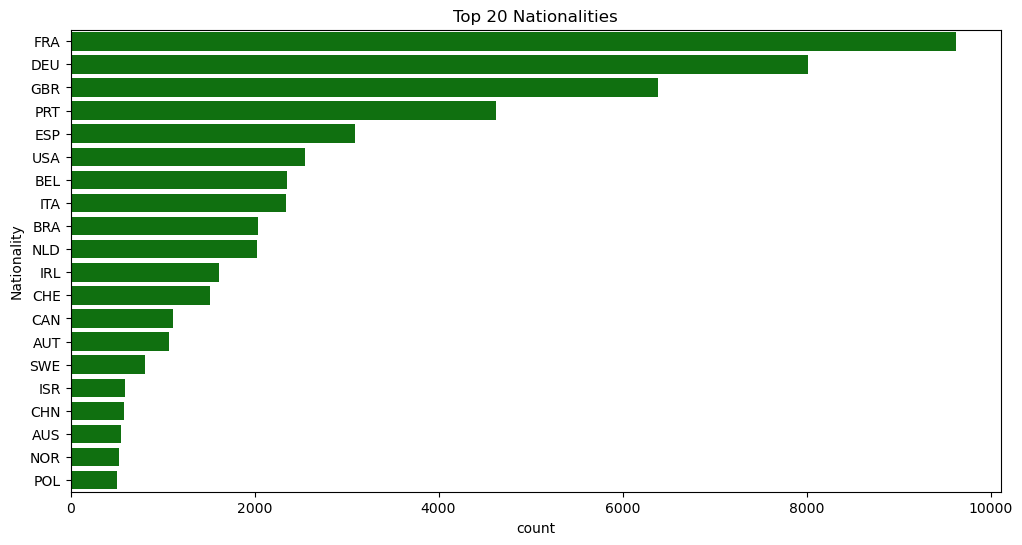

In [31]:
# Plot the top20 nationalities
plt.figure(figsize=(12, 6))
sns.countplot(data=customers, y='Nationality', order=top20_nationalities, color='green')
plt.title('Top 20 Nationalities')
plt.show()

In [32]:
# Check how many nationalities have less than 10 occurrences
nationalities_less_than_10 = nationality_counts[nationality_counts < 10].index
print(f'There are {nationalities_less_than_10.shape[0]} nationalities with less than 10 occurrences')

There are 95 nationalities with less than 10 occurrences


In [33]:
# Check for correlation between nationality and other columns
customers.select_dtypes(include=[np.number]).corr()['TotalRevenue'].sort_values(ascending=False)

TotalRevenue            1.000000
LodgingRevenue          0.967444
OtherRevenue            0.691993
PersonsNights           0.606386
RoomNights              0.569899
BookingsCheckedIn       0.101141
SRQuietRoom             0.070483
AverageLeadTime         0.049221
SRCrib                  0.025102
SRKingSizeBed           0.025080
SRHighFloor             0.019162
BookingsCanceled        0.018797
SRShower                0.013557
SRAwayFromElevator      0.012933
SRLowFloor              0.008240
SRMediumFloor           0.006323
SRNoAlcoholInMiniBar    0.006271
SRBathtub               0.005020
BookingsNoShowed        0.004315
SRTwinBed               0.003790
SRNearElevator          0.000294
SRAccessibleRoom       -0.002693
Age                    -0.047708
DaysSinceCreation      -0.132445
Name: TotalRevenue, dtype: float64

In [34]:
# # Revenue per country
# list_of_countries_revenue = customers.groupby('Nationality')['TotalRevenue'].sum().reset_index()
# list_of_countries_revenue.set_index('Nationality', inplace=True)

# number_of_clients = data['Nationality'].value_counts().reset_index()
# number_of_clients.set_index('Nationality', inplace=True)

In [35]:

# country_counts = customers['Nationality'].value_counts().reset_index()
# country_counts.columns = ['ISO_A3', 'clients']

# world = gpd.read_file("../ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

In [36]:
# Merge the world map with client data
# world = world.merge(country_counts, how="left", left_on="ISO_A3_EH", right_on="ISO_A3")

# Fill missing values with 0 (countries with no clients)
# world["clients"] = world["clients"].apply(lambda x: 0 if x < 1 else x)

In [37]:
# world = world.dropna(subset='clients')

In [38]:
#country_counts

In [39]:
#country_counts['ISO_A3'].value_counts()

In [40]:
# columns_to_keep_worldviz = ['ISO_A3_EH', 'clients', 'geometry', 'NAME']
# more_collumns_to_keep = ['TotalRevenue']
# world_viz= world[columns_to_keep_worldviz]
# world_viz.set_index('ISO_A3_EH', inplace=True)
# world_viz[more_collumns_to_keep] = list_of_countries_revenue[more_collumns_to_keep]
# world_viz.reset_index(inplace=True)

In [41]:
# Please choose a better set of colours

# m = world_viz.explore(column='clients', cmap='hot', legend=False, edgecolor='black', linewidth=0.8, legend_name='Number of Clients')

In [42]:
#m

<a class="anchor" id="sub-section-1_5_1_2">

#### 1.5.1.2. Distribution Channel
    
</a>

**Key Findings:**
- Most bookings are made through a Travel Agent/Operator (~84%)
- Only 13% of the bookings are made directly with the hotel.

In [43]:
# Check the distribution of DistributionChannel
distribution_channel = customers["DistributionChannel"].value_counts()
distribution_channel

DistributionChannel
Travel Agent/Operator    48664
Direct                    7537
Corporate                  513
GDS Systems                 47
Name: count, dtype: int64

In [44]:
# Compute the percentages of each distribution channel
distribution_channel_percentages = round(distribution_channel/customers.shape[0]*100,2)
distribution_channel_percentages

DistributionChannel
Travel Agent/Operator    85.73
Direct                   13.28
Corporate                 0.90
GDS Systems               0.08
Name: count, dtype: float64

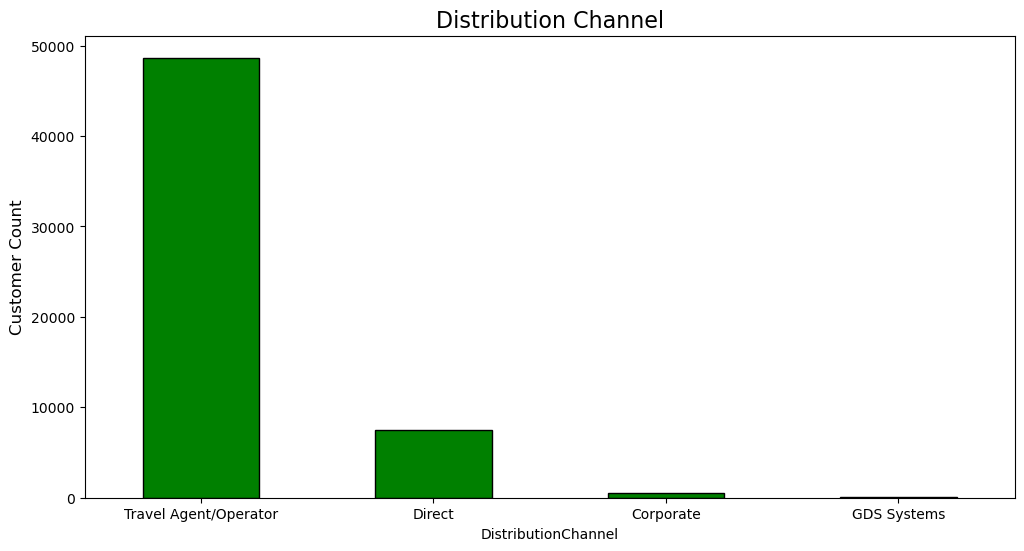

In [45]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))
distribution_channel.plot(kind="bar", color='green', edgecolor="black")
plt.title("Distribution Channel", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="sub-section-1_5_2">

### 1.5.2. Numerical Variables
    
</a>

In [46]:
customers_numerical.columns

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
       'TotalRevenue'],
      dtype='object')

<a class="anchor" id="sub-section-1_5_2_1">

#### 1.5.2.1. Age
    
</a>

**Key Findings:**
- The average age is 48.53 and the median age is 48.0;
- After cleaning the dataset, there are 145 missing values;
- Only 0.01% (10) of customers are above 90 years old. We decided to drop them, as we considered them outliers.
- Cases where age was negative are turn into NaN.
- Missing values were filled using KNN Imputer for the 5 nearners neighbors.

In [47]:
# Check missing values in age column
missing_age = customers['Age'].isnull().sum()
print(f'There are {missing_age} missing values in the Age column.')

There are 145 missing values in the Age column.


In [48]:
# Check the min and max values of Age
min_age = customers['Age'].min()
max_age = customers['Age'].max()
print(f'The minimum age is {min_age} and the maximum age is {max_age}.')

The minimum age is -9.0 and the maximum age is 115.0.


In [49]:
# Check age correlation with other columns 
customers.select_dtypes(include=[np.number]).corr()['Age'].sort_values(ascending=False)

Age                     1.000000
AverageLeadTime         0.244571
OtherRevenue            0.067943
SRTwinBed               0.052724
DaysSinceCreation       0.047497
SRLowFloor              0.016834
SRNearElevator          0.015930
SRQuietRoom             0.013793
BookingsCheckedIn       0.013550
SRMediumFloor           0.008957
SRAwayFromElevator      0.008704
BookingsNoShowed        0.006561
BookingsCanceled        0.005543
SRShower                0.004729
SRAccessibleRoom        0.002779
RoomNights             -0.003115
SRNoAlcoholInMiniBar   -0.006547
SRKingSizeBed          -0.022162
SRBathtub              -0.022302
SRHighFloor            -0.031224
PersonsNights          -0.033966
TotalRevenue           -0.047708
SRCrib                 -0.080374
LodgingRevenue         -0.081543
Name: Age, dtype: float64

By checking if any variables were correlated with Age, we wanted to identify any variables that could be used in a predictive model to predict age. However, the variable with the highest correlation is only 25% correlated with age, and thus, we discarded this idea and assumed to imput missing values with KNNimputer.

In [50]:
# Check cases where age is negative
print(f'There are {len(customers[customers["Age"] < 0])} cases where age is negative')
customers[customers['Age'] < 0]

There are 6 cases where age is negative


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5128,FRA,-8.0,1271,66,93.30,14.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,107.30
8361,DEU,-6.0,1217,256,126.00,109.0,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0,235.00
9920,DZA,-5.0,1193,54,138.93,29.5,0,0,1,4,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,168.43
10663,DEU,-9.0,1181,292,126.00,113.0,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,239.00
20407,USA,-8.0,1022,163,939.60,303.3,0,0,1,9,3,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0,1242.90
57358,PRT,-5.0,510,130,388.80,47.2,0,0,1,8,4,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,436.00


In [51]:
# Check cases where age is above 90
print(f'There are {len(customers[customers["Age"] > 90])} cases where age is above 90 years old, which corresponds to {len(customers[customers["Age"] > 90])/len(customers)*100:.2f}% of the data.')
customers[customers['Age'] > 90]

There are 8 cases where age is above 90 years old, which corresponds to 0.01% of the data.


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,22,79.00,25.5,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,104.50
7425,DEU,92.0,1231,0,535.00,170.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,705.00
19867,PRT,93.0,1039,18,68.00,14.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,82.00
44525,DEU,114.0,627,7,234.00,34.5,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,268.50
62694,NOR,97.0,467,87,734.00,24.0,0,0,1,12,6,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0,758.00
72434,PRT,91.0,396,254,226.00,28.0,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,254.00
87089,PRT,111.0,244,18,210.00,52.0,0,0,1,4,2,Direct,1,0,0,0,0,0,0,1,0,0,0,0,0,262.00
99523,ITA,93.0,136,6,210.48,16.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,1,0,1,0,1,0,0,0,226.48


In [52]:
# Drop rows where age is above 90
customers = customers[customers['Age'] <= 90]

In [53]:
# Turn the rows with age below 0 to NaN
customers.loc[customers['Age'] < 0, 'Age'] = np.nan

In [54]:
# Drop rows with Age < 18
customers = customers[customers['Age'] >= 18]

In [55]:
# Initialize KNNImputer with k neighbors
imputer = KNNImputer(n_neighbors=5)  

# Apply KNN imputation only to the 'Age' column
customers[['Age']] = imputer.fit_transform(customers[['Age']])

In [56]:
# Check for missing values in age
print(f'There are {customers["Age"].isnull().sum()} missing values left in Age column.')

There are 0 missing values left in Age column.


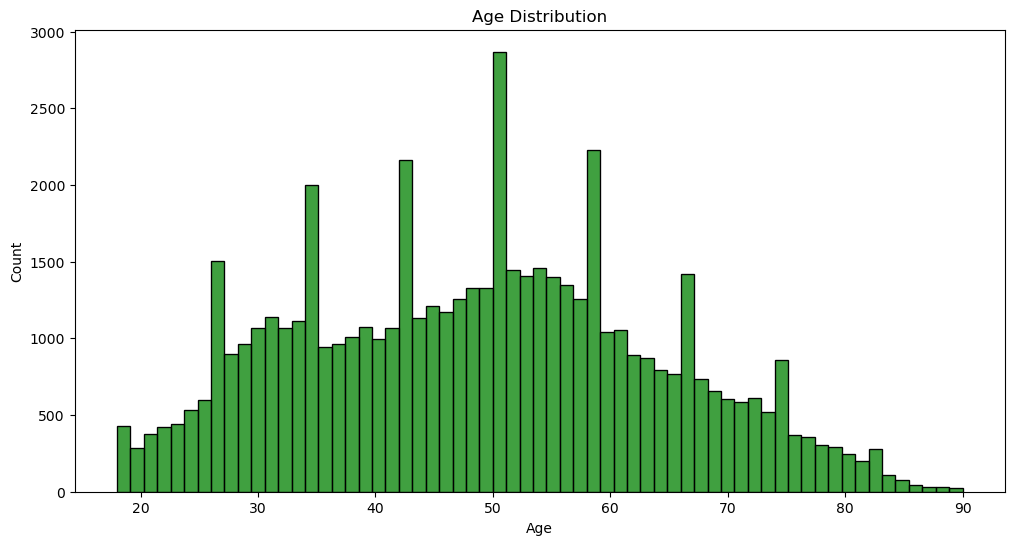

In [57]:
# Check the distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(customers['Age'], color='green', edgecolor="black")
plt.title('Age Distribution')
plt.show()

In [58]:
customers['Age'].agg(['mean', 'median'])
print(f'The average age is {customers["Age"].mean():.2f} and the median age is {customers["Age"].median()}.')

The average age is 48.75 and the median age is 49.0.


<a class="anchor" id="sub-section-1_5_2_2">

#### 1.5.2.2. Days Since Creation
    
</a>

**Key Findings:**
- Most customers are recent ones, i.e. within their first 2 years since joining
- But there is a large spread (std = 374)

In [59]:
customers["DaysSinceCreation"].describe().T

count    55654.000000
mean       697.746343
std        375.801898
min         36.000000
25%        391.000000
50%        730.000000
75%       1021.000000
max       1385.000000
Name: DaysSinceCreation, dtype: float64

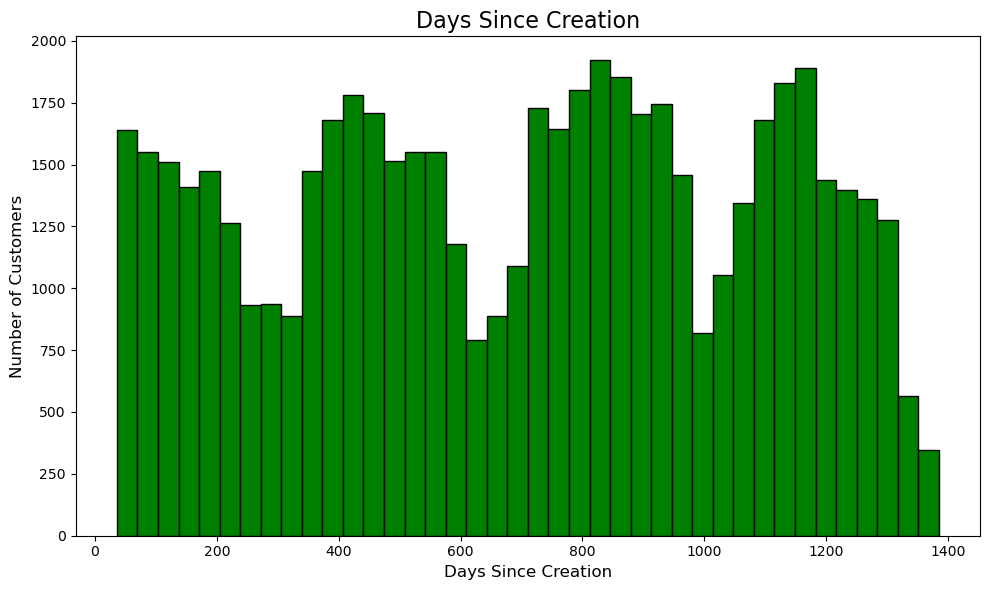

In [60]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(customers["DaysSinceCreation"], bins=40, color='green', edgecolor="black")

plt.title("Days Since Creation", fontsize=16)
plt.xlabel("Days Since Creation", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()  
plt.show()

From the histogram, we can distinguish peaks, with some recent ones. For a better understanding, we can classify these into groups:
- group < 365 (less than a year)
- 365 < group < 730 (1-2 years)
- 730 < group < 1095 (2-3 years)
- 1095 < group (more than 3 years)

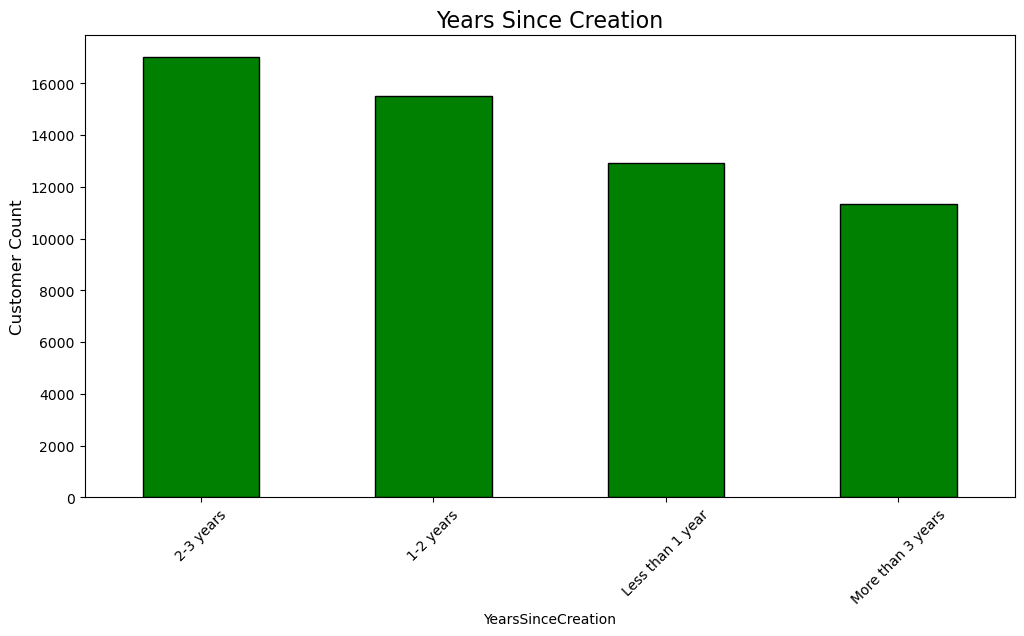

In [61]:
# Define age ranges and their respective labels
creation_date_bins = [0, 365, 730, 1095, float('inf')]
creation_date_labels = ["Less than 1 year", "1-2 years", "2-3 years", "More than 3 years"]

# .cut() segments into the bins and assigns to corresponding labels
customers_numerical["YearsSinceCreation"] = pd.cut(customers_numerical["DaysSinceCreation"], bins=creation_date_bins, labels=creation_date_labels)

# Plot a bar chart 
plt.figure(figsize=(12, 6))

years_since_creation = customers_numerical["YearsSinceCreation"].value_counts()

years_since_creation.plot(kind="bar", color='green', edgecolor="black")

plt.title("Years Since Creation", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<a class="anchor" id="sub-section-1_5_2_3">

#### 1.5.2.3. Average Lead Time
    
</a>

We found rows where AverageLeadTime was negative, so we dropped them.

In [62]:
# Check for min and max values in AverageLeadTime
min_leadtime = customers['AverageLeadTime'].min()
max_leadtime = customers['AverageLeadTime'].max()
print(f'The minimum lead time is {min_leadtime} and the maximum lead time is {max_leadtime}.')

The minimum lead time is -1 and the maximum lead time is 588.


In [63]:
# Check values where AverageLeadTime is negative
negative_leadtime = customers[customers['AverageLeadTime'] < 0]
print(f'There are {len(negative_leadtime)} cases where AverageLeadTime is negative.')

There are 12 cases where AverageLeadTime is negative.


In [64]:
# Drop rows where AverageLeadTime is negative
customers = customers[customers['AverageLeadTime'] >= 0]

<a class="anchor" id="sub-section-1_5_2_4">

#### 1.5.2.4. Lodging Revenue
    
</a>

We separated customers with lodging spending over 8k into a rich customers dataframe, because they were outliers for the normal analysis.

In [65]:
customers['LodgingRevenue'].describe().T

count    55642.000000
mean       421.335050
std        368.063448
min          0.000000
25%        216.750000
50%        331.000000
75%        504.000000
max      14044.800000
Name: LodgingRevenue, dtype: float64

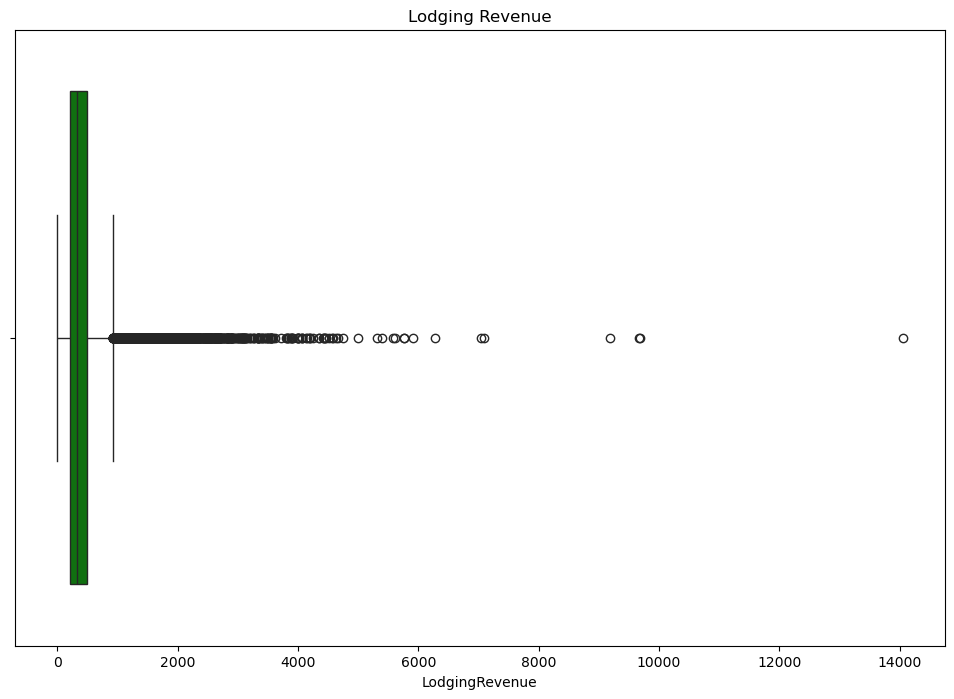

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=customers['LodgingRevenue'], color='green')
plt.title('Lodging Revenue')
plt.show()

In [67]:
# Check row with LodgingRevenue above 8000
customers[customers['LodgingRevenue'] > 8000]

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
23967,USA,24.0,949,7,9682.40,1300.0,0,0,1,12,6,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,10982.40
38718,NAM,63.0,734,2,9180.00,1144.5,1,0,2,16,8,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0,10324.50
42504,DEU,52.0,669,65,9665.66,2265.0,0,0,1,10,5,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,11930.66
105702,DNK,51.0,83,160,14044.80,2891.5,0,0,1,24,12,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,16936.30


In [68]:
# Keep only customers with LodgingRevenue below 8000
rich_customers = customers[customers['LodgingRevenue'] > 8000]
customers = customers[customers['LodgingRevenue'] <= 8000]

<a class="anchor" id="sub-section-1_5_2_5">

#### 1.5.2.5. Other Revenue
    
</a>

In [69]:
customers['OtherRevenue'].describe().T

count    55638.000000
mean       105.075114
std        129.630660
min          0.000000
25%         42.000000
50%         71.000000
75%        130.000000
max       8859.250000
Name: OtherRevenue, dtype: float64

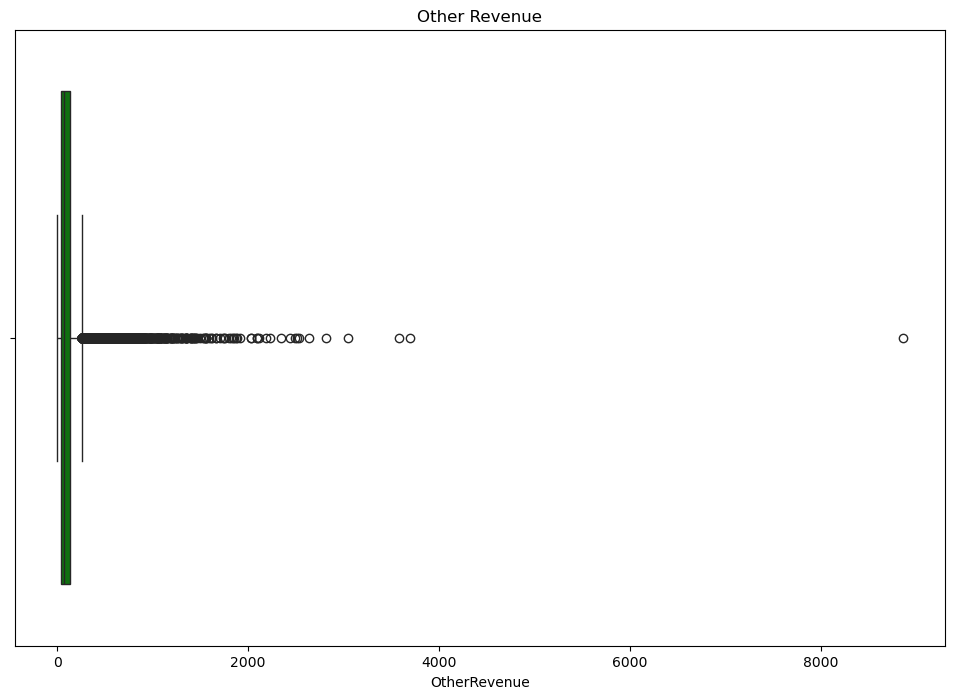

In [70]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=customers['OtherRevenue'], color='green')
plt.title('Other Revenue')
plt.show()

In [71]:
# Check row with OtherRevenue above 4000
customers[customers['OtherRevenue'] > 4000]

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
49184,PRT,45.0,577,14,1649.5,8859.25,0,0,11,29,15,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,10508.75


In [72]:
# Delete customers with OtherRevenue above 4000
customers = customers[customers['OtherRevenue'] <= 4000]

In [73]:
customers['OtherRevenue'].describe().T

count    55637.000000
mean       104.917769
std        124.205232
min          0.000000
25%         42.000000
50%         71.000000
75%        130.000000
max       3692.400000
Name: OtherRevenue, dtype: float64

<a class="anchor" id="sub-section-1_5_2_6">

#### 1.5.2.6. Bookings Canceled
    
</a>

In [74]:
customers['BookingsCanceled'].value_counts()

BookingsCanceled
0     55607
1        24
3         4
15        1
2         1
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

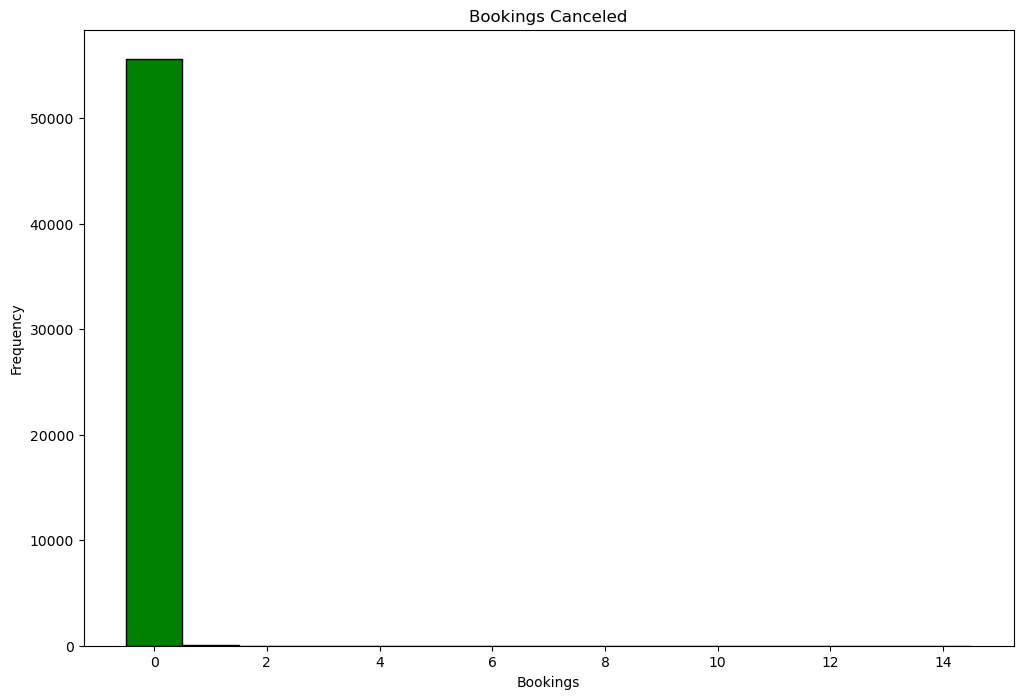

In [75]:
plt.figure(figsize=(12, 8))
plt.hist(customers['BookingsCanceled'], bins=np.arange(-0.5,15.5,1), color='green', edgecolor='black')
plt.title('Bookings Canceled')
plt.xlabel('Bookings')
plt.ylabel('Frequency')

In [76]:
# Get the percentage of customers who have canceled bookings
canceled_bookings = customers[customers['BookingsCanceled'] > 0].shape[0]
total_customers = customers.shape[0]
percentage_canceled = canceled_bookings / total_customers * 100
print(f'{percentage_canceled:.2f}% of customers have canceled bookings.')

0.05% of customers have canceled bookings.


<a class="anchor" id="sub-section-1_5_2_7">

#### 1.5.2.7. Bookings No Showed
    
</a>

In [77]:
customers['BookingsNoShowed'].value_counts()

BookingsNoShowed
0    55626
1       11
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

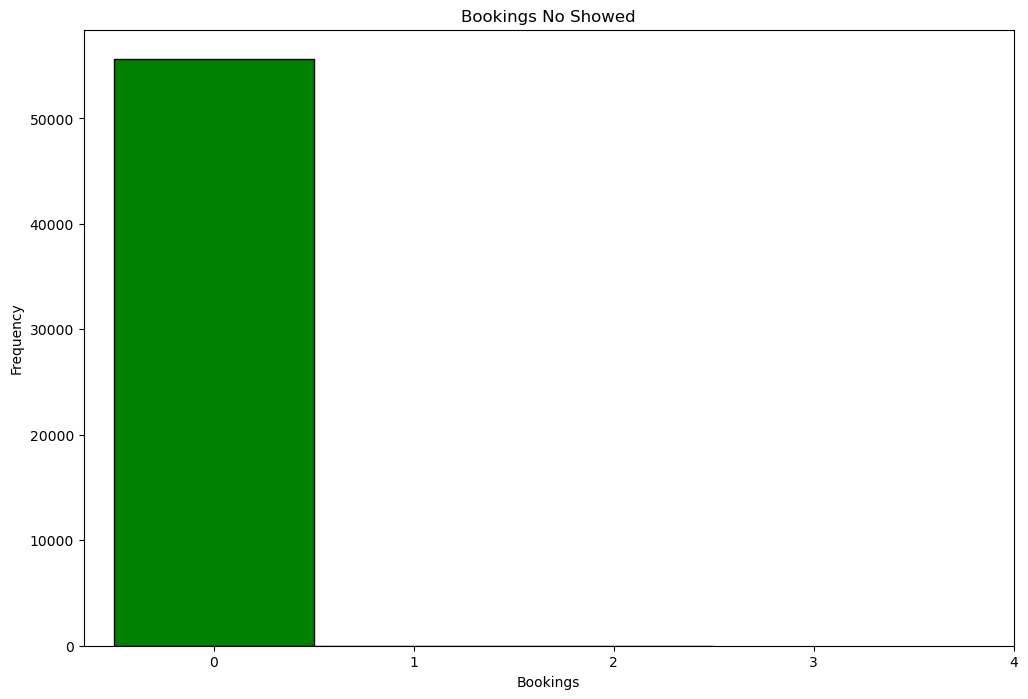

In [78]:
plt.figure(figsize=(12, 8))
plt.hist(customers['BookingsNoShowed'], bins=np.arange(-0.5,3.5,1), color='green', edgecolor='black')
plt.title('Bookings No Showed')
plt.xticks(range(5))
plt.xlabel('Bookings')
plt.ylabel('Frequency')

In [79]:
# get the percentage of customers who have no-showed bookings
noshowed_bookings = customers[customers['BookingsNoShowed'] > 0].shape[0]
percentage_noshowed = noshowed_bookings / total_customers * 100
print(f'{percentage_noshowed:.2f}% of customers have no-showed bookings.')

0.02% of customers have no-showed bookings.


<a class="anchor" id="sub-section-1_5_2_8">

#### 1.5.2.8. Bookings Checked In
    
</a>

In [80]:
customers['BookingsCheckedIn'].value_counts()

BookingsCheckedIn
1     54629
2       890
3        65
4        16
5         8
7         5
9         4
11        3
8         3
13        2
15        2
6         2
10        2
22        1
17        1
18        1
76        1
12        1
35        1
Name: count, dtype: int64

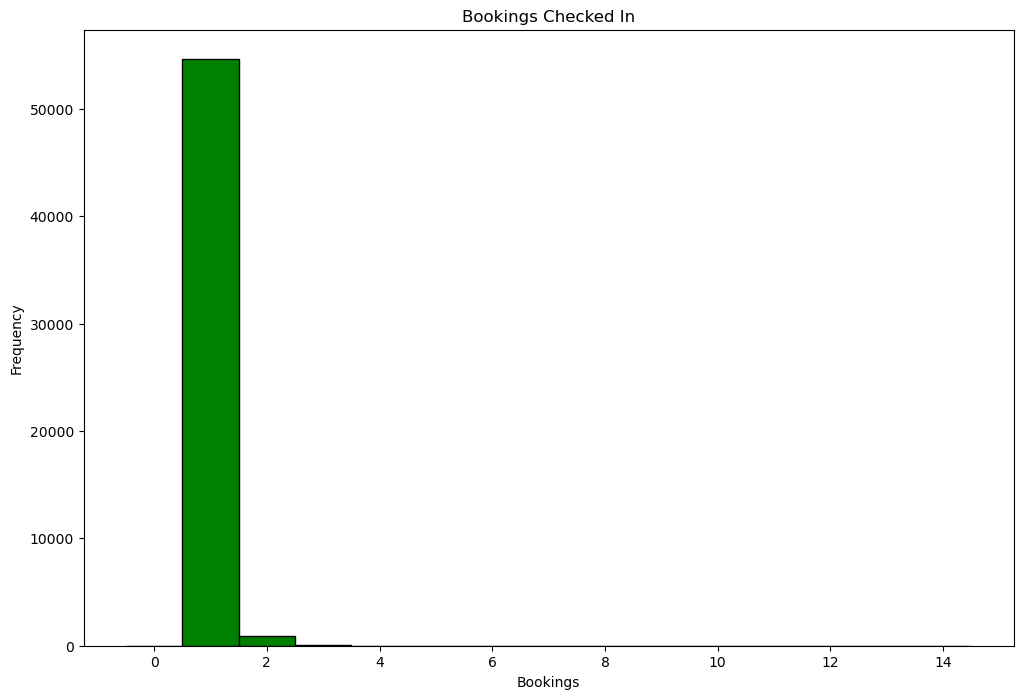

In [81]:
plt.figure(figsize=(12, 8))
plt.hist(customers['BookingsCheckedIn'], bins=np.arange(-0.5,15.5,1), color='green', edgecolor='black')
plt.title('Bookings Checked In')
plt.xlabel('Bookings')
plt.ylabel('Frequency')
plt.show()

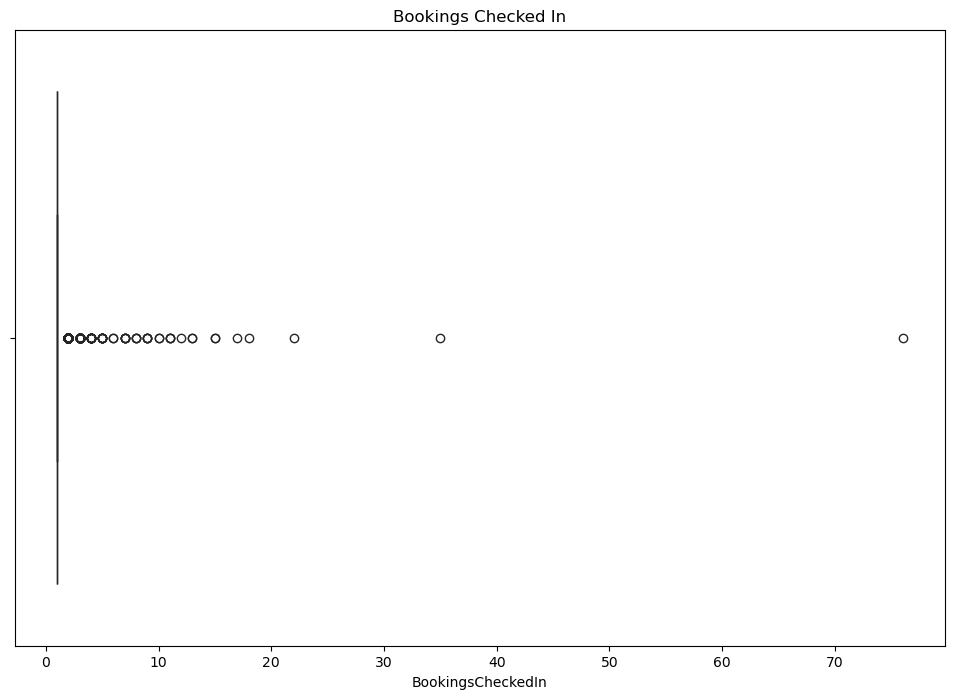

In [82]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=customers['BookingsCheckedIn'], color='green')
plt.title('Bookings Checked In')
plt.show()

2/3 of customers have been in the hotel only once.

In [83]:
# get the percentage of customers who have checked in
checkedin_bookings = customers[customers['BookingsCheckedIn'] > 0].shape[0]
percentage_checkedin = checkedin_bookings / total_customers * 100
print(f'{percentage_checkedin:.2f}% of customers have checked in bookings.')

100.00% of customers have checked in bookings.


<a class="anchor" id="sub-section-1_5_2_9">

#### 1.5.2.9. Persons Nights
    
</a>

PersonsNights = (adults + children) * number of nights 

In [84]:
customers['PersonsNights'].value_counts()

PersonsNights
6     14993
4      9898
8      9627
2      5520
10     4025
12     3657
9      2033
14     1738
3      1050
15      783
16      614
18      450
21      383
20      257
24      149
28       82
5        56
22       46
30       45
27       35
7        31
32       22
33       19
36       19
26       16
11       12
25       11
17        8
13        6
35        6
23        6
40        5
42        5
34        4
39        4
44        4
45        2
19        2
38        2
68        2
48        2
52        1
49        1
56        1
91        1
99        1
80        1
57        1
60        1
Name: count, dtype: int64

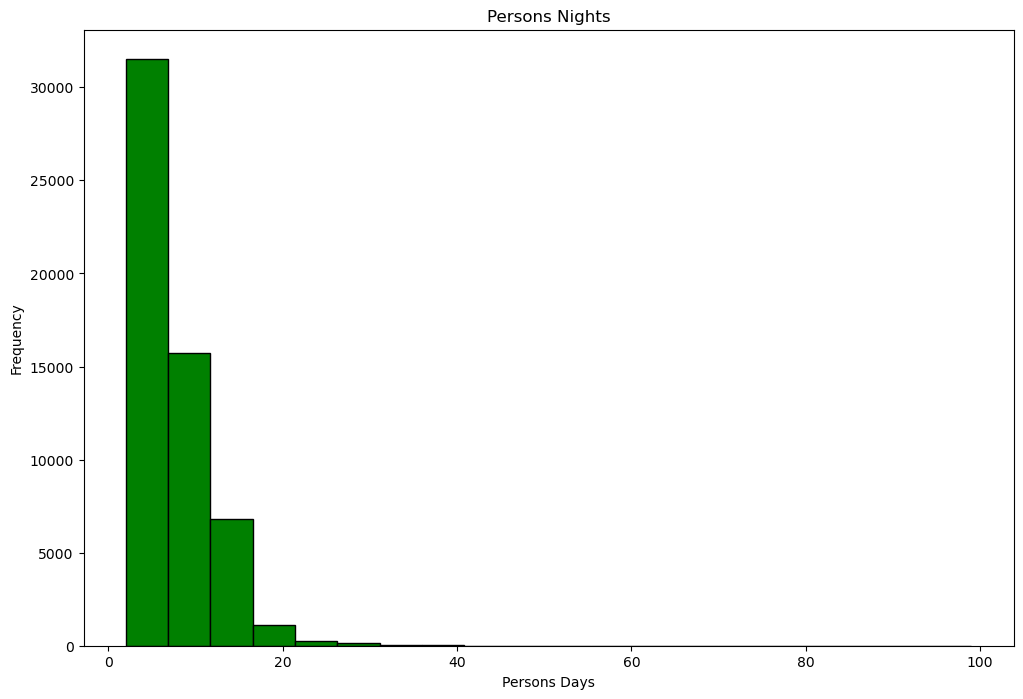

In [85]:
plt.figure(figsize=(12, 8))
plt.hist(customers['PersonsNights'], bins=20, color='green', edgecolor='black')
plt.title('Persons Nights')
plt.xlabel('Persons Days')
plt.ylabel('Frequency')
plt.show()

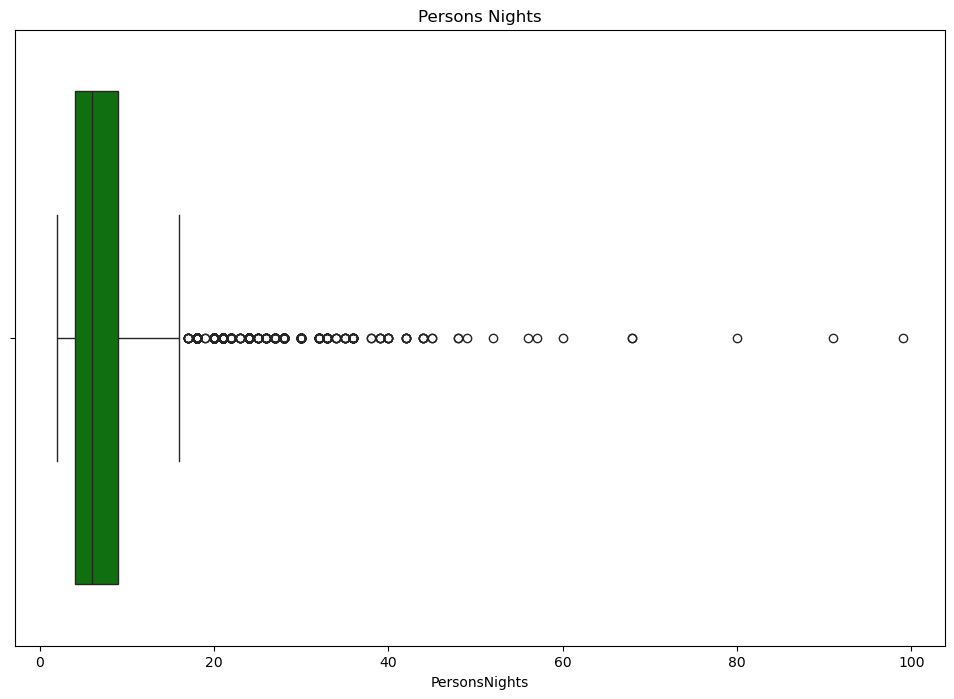

In [86]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=customers['PersonsNights'], color='green')
plt.title('Persons Nights')
plt.show()

<a class="anchor" id="sub-section-1_5_3">

### 1.5.3. Binary Variables
    
</a>

<a class="anchor" id="sub-section-1_5_3_1">

#### 1.5.3.1. SRFloor
    
</a>

Checking customer floor preference by making a fusion of the low-high floor variables:
- If the client has no preference then 0
- If its on a low floor then 1 
- If its on a medium floor then 2
- If its on a high floor then 3
- If asked for more than 1 type of floor then 4

In [87]:
# Check customers who asked for all floor type at least once
Check0 = customers[(customers['SRHighFloor'] > 0) & (customers['SRLowFloor'] > 0) & (customers['SRMediumFloor'] > 0)]
Check0

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,


In [88]:
# Check customers who asked for a high and low floor at least once, but not a medium floor
Check1 = customers[(customers['SRHighFloor'] > 0) & (customers['SRLowFloor'] > 0) & (customers['SRMediumFloor'] == 0)]
Check1

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,


In [89]:
# Check customers who asked for a high and medium floor at least once, but not a low floor
Check2 = customers[(customers['SRHighFloor'] > 0) & (customers['SRLowFloor'] == 0) & (customers['SRMediumFloor'] > 0)]
Check2

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
25859,SWE,51.0,921,127,2020.0,220.0,0,0,1,8,2,Travel Agent/Operator,1,0,0,1,0,0,0,1,0,0,0,0,0,2240.0


In [90]:
# Check customers who asked for a low and medium floor at least once, but not a high floor
Check3 = customers[(customers['SRHighFloor'] == 0) & (customers['SRLowFloor'] > 0) & (customers['SRMediumFloor'] > 0)]
Check3

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
27802,GBR,45.0,891,90,114.0,14.0,0,0,1,2,1,Travel Agent/Operator,0,1,0,1,0,0,0,0,0,0,0,0,1,128.0


In [91]:
# Check customers who never asked for a floor type
#Check4 = customers[(customers['SRHighFloor'] == 0) & (customers['SRLowFloor'] == 0) & (customers['SRMediumFloor'] == 0)]
#Check4

In [92]:
def type_of_floor(row):
     if row['SRMediumFloor'] == 1 and row['SRHighFloor'] == 1:
         return 4
     elif row['SRLowFloor'] == 1 and row['SRMediumFloor'] == 1:
         return 4
     elif row['SRLowFloor'] == 1:     # preference for lower floors
         return 1
     elif row['SRMediumFloor'] == 1: # preference for medium floors
         return 2
     elif row['SRHighFloor'] == 1:    # preference for higher floors
         return 3
     else:                           # no preference
         return 0 

In [93]:
customers['SRFloor'] = customers.apply(type_of_floor, axis=1)

In [94]:
customers['SRFloor'].value_counts()

SRFloor
0    52801
3     2712
1       82
2       40
4        2
Name: count, dtype: int64

In [95]:
# Getting the percentage of every number in SRFloor
customers['SRFloor'].value_counts(normalize=True)

SRFloor
0    0.949027
3    0.048745
1    0.001474
2    0.000719
4    0.000036
Name: proportion, dtype: float64

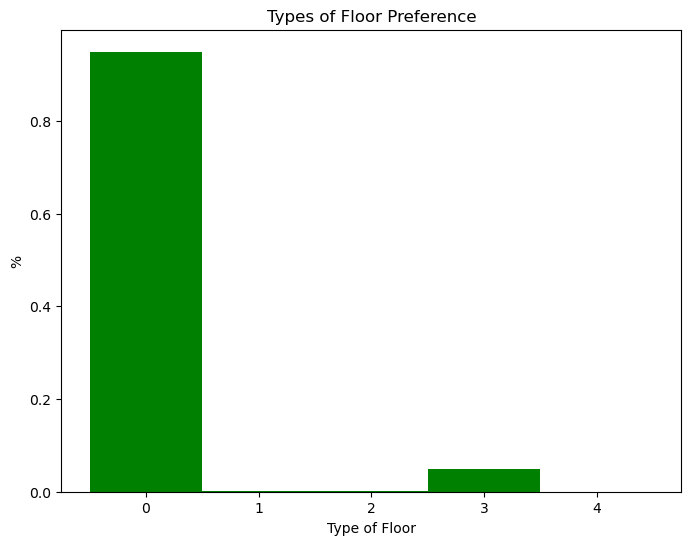

In [96]:
# Plot of types of floors preference 
# This plot could get some improvements 

plt.figure(figsize=(8, 6))
plt.hist(customers['SRFloor'], bins=np.arange(-0.5,5.5,1), weights=[1 / len(customers['SRFloor'])] * len(customers['SRFloor']), color='green')
plt.title('Types of Floor Preference')
plt.xticks(range(5))
plt.xlabel('Type of Floor')
plt.ylabel('%')
plt.show()

<a class="anchor" id="sub-section-1_5_3_2">

#### 1.5.3.2. SRBathtub & SRShower
    
</a>

Join SRBathtub and SRShower features where:
- If the client has no preference then its 0
- If the client usually asks for a room with a bathtub then 1
- If the client usually asks for a room with a shower then 2

In [97]:
customers['SRBathtub'].value_counts()

SRBathtub
0    55445
1      192
Name: count, dtype: int64

In [98]:
# Check cases where the customer asked for a bathtub and a shower
check1 = customers[(customers['SRBathtub'] > 0) & (customers['SRShower'] > 0)]
check1

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,SRFloor
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [99]:
def bathroom(row):
    if row['SRBathtub'] == 0 and row['SRShower'] == 0:
        return 0
    elif row['SRBathtub'] == 1:
        return 1
    elif row['SRShower'] == 1:
        return 2
    else:
        return 0
    
customers['SRBathroom'] = customers.apply(bathroom, axis=1)

In [100]:
customers['SRBathroom'].value_counts()

SRBathroom
0    55333
1      192
2      112
Name: count, dtype: int64

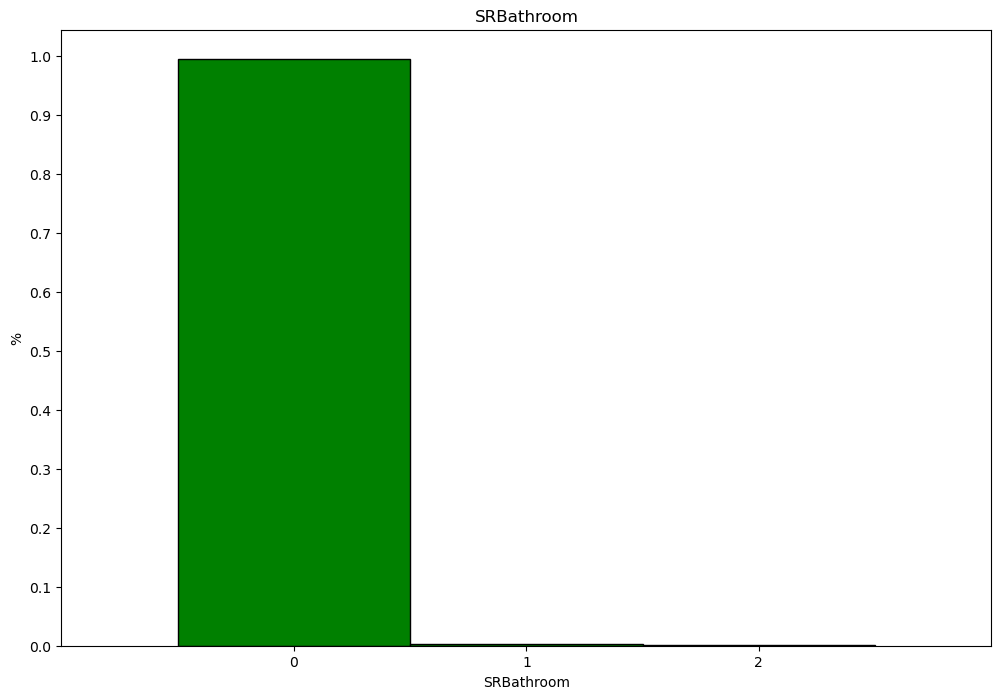

99.45% of customers have no preference.
0.35% of customers ask for a bathtub.
0.35% of customers ask for a shower.


In [101]:
plt.figure(figsize=(12, 8))
plt.hist(customers['SRBathroom'], bins=[-0.5,0.5,1.5,2.5], color='green', weights=[1 / len(customers['SRBathroom'])] * len(customers['SRBathroom']), edgecolor='black')
plt.title('SRBathroom')
plt.xlabel('SRBathroom')
plt.ylabel('%')
plt.xticks(range(3))
plt.yticks([i/10 for i in range(11)])
plt.xlim([-1, 3])
plt.show()

print(f'{len(customers[customers["SRBathroom"]==0])/len(customers["SRBathroom"])*100:.2f}% of customers have no preference.')
print(f'{len(customers[customers["SRBathroom"]==1])/len(customers["SRBathroom"])*100:.2f}% of customers ask for a bathtub.')
print(f'{len(customers[customers["SRBathroom"]==1])/len(customers["SRBathroom"])*100:.2f}% of customers ask for a shower.')

<a class="anchor" id="sub-section-1_5_3_3">

#### 1.5.3.3. SRCrib
    
</a>

In [102]:
customers['SRCrib'].value_counts()

SRCrib
0    54913
1      724
Name: count, dtype: int64

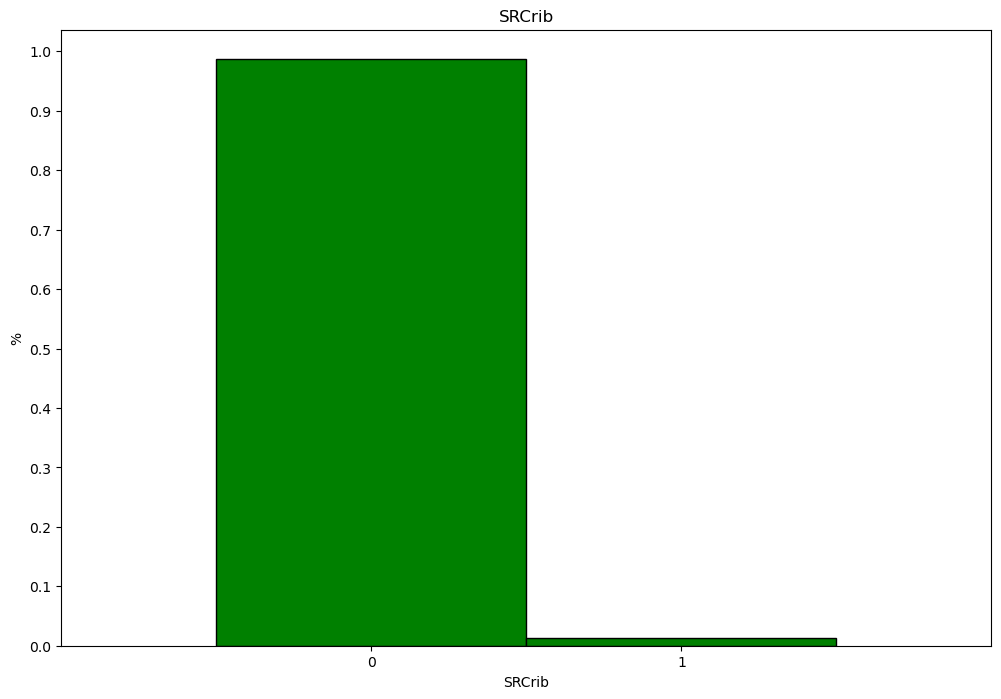

98.70% of customers do not ask for a crib.
1.30% of customers ask for a crib.


In [103]:
plt.figure(figsize=(12, 8))
plt.hist(customers['SRCrib'], bins=[-0.5, 0.5, 1.5], color='green', weights=[1 / len(customers['SRCrib'])] * len(customers['SRCrib']), edgecolor='black')
plt.title('SRCrib')
plt.xlabel('SRCrib')
plt.ylabel('%')
plt.xticks(range(2))
plt.yticks([i/10 for i in range(11)])
plt.xlim([-1, 2])
plt.show()

print(f'{len(customers[customers["SRCrib"]==0])/len(customers["SRCrib"])*100:.2f}% of customers do not ask for a crib.')
print(f'{len(customers[customers["SRCrib"]==1])/len(customers["SRCrib"])*100:.2f}% of customers ask for a crib.')

<a class="anchor" id="sub-section-1_5_3_4">

#### 1.5.3.4. SRNearElevator & SRAwayFromElevator
    
</a>

Join SRNearElevator and SRAwayFromElevator features where:
- If the client has no preference then its 0
- If the client usually asks for a room near the elevator then 1
- If the client usually asks for a room away from the elevator then 2

In [104]:
check1 = customers[(customers['SRNearElevator'] == 1) & (customers['SRAwayFromElevator'] == 1)]
check1

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,SRFloor,SRBathroom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [105]:
def elevator(row):
    if row['SRNearElevator'] == 0 and row['SRAwayFromElevator'] == 0:
        return 0
    elif row['SRNearElevator'] == 1:
        return 1
    elif row['SRAwayFromElevator'] == 1:
        return 2
    else:
        return 0

In [106]:
customers['SRElevator'] = customers.apply(elevator, axis=1)

In [107]:
customers['SRElevator'].value_counts()

SRElevator
0    55396
2      225
1       16
Name: count, dtype: int64

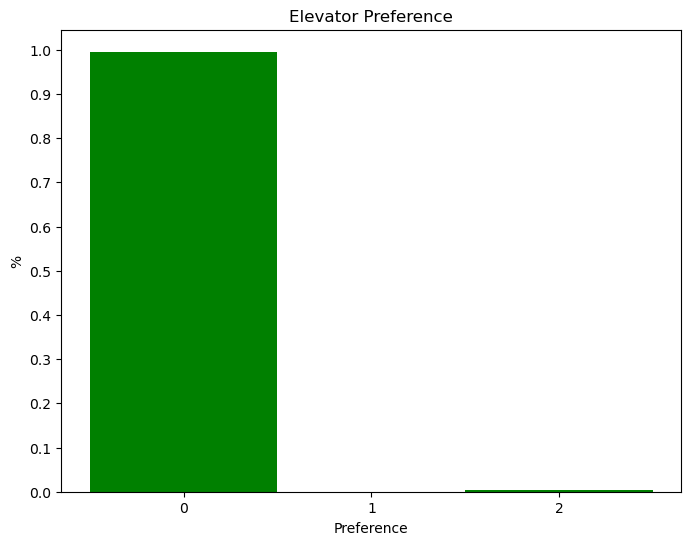

99.57% of customers have no preferences.
0.03% of customers prefer to have a room with an elevator near.
0.40% of customers prefer to have a room with an elevator further away.


In [108]:
plt.figure(figsize=(8, 6))
plt.hist(customers['SRElevator'], bins=[-0.5,0.5,1.5,2.5], color='green', weights=[1 / len(customers['SRElevator'])] * len(customers['SRElevator']))
plt.title('Elevator Preference')
plt.xticks(range(3))
plt.yticks([i/10 for i in range(11)])
plt.xlabel('Preference')
plt.ylabel('%')
plt.show()

print(f'{len(customers[customers["SRElevator"]==0])/len(customers["SRElevator"])*100:.2f}% of customers have no preferences.')
print(f'{len(customers[customers["SRElevator"]==1])/len(customers["SRElevator"])*100:.2f}% of customers prefer to have a room with an elevator near.')
print(f'{len(customers[customers["SRElevator"]==2])/len(customers["SRElevator"])*100:.2f}% of customers prefer to have a room with an elevator further away.')

<a class="anchor" id="sub-section-1_5_3_5">

#### 1.5.3.5. SRKingSizedBed & SRTwinBed
    
</a>

In [109]:
# Get the counts
SRKingSizedBed_count = customers['SRKingSizeBed'].value_counts()
SRTwinBed_count = customers['SRTwinBed'].value_counts()

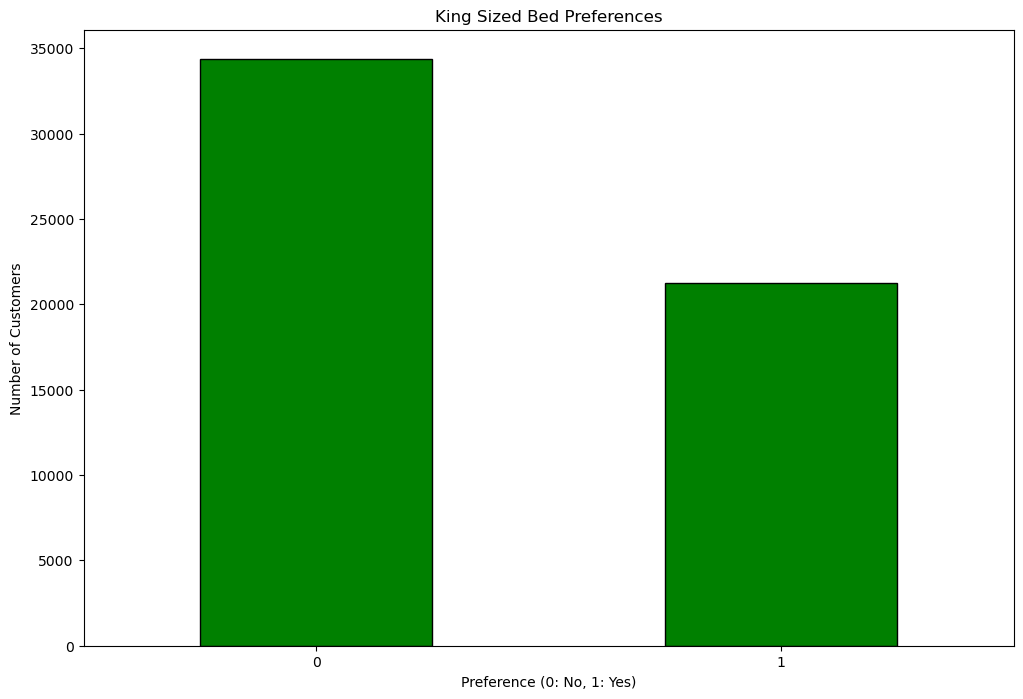

In [110]:
plt.figure(figsize=(12, 8))
SRKingSizedBed_count.plot.bar(color='green', edgecolor='black')
plt.title('King Sized Bed Preferences')
plt.xlabel('Preference (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


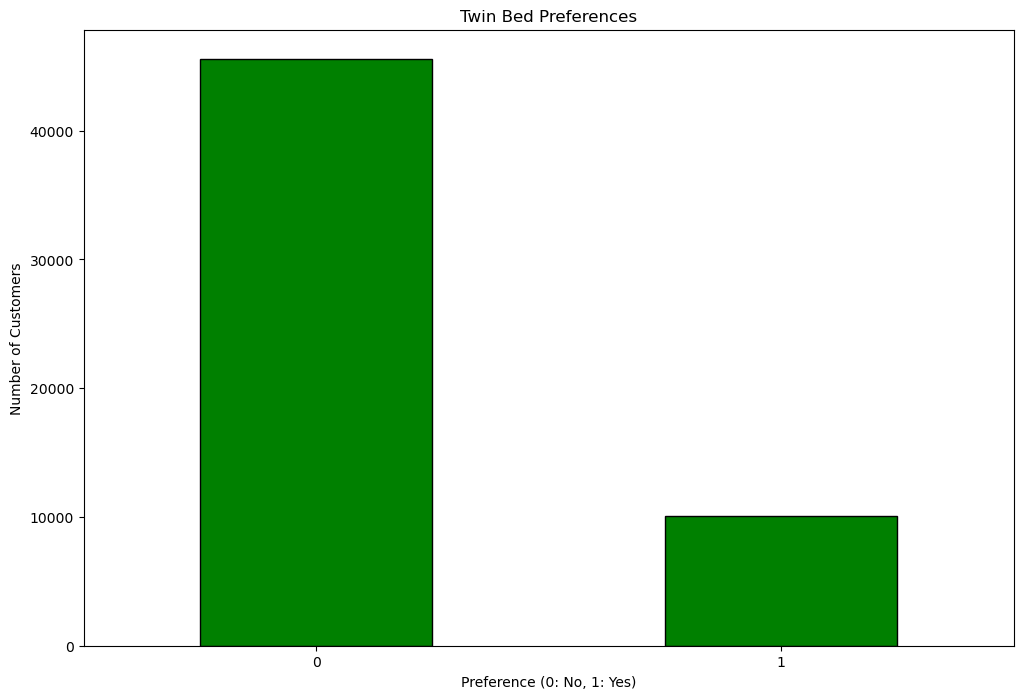

In [111]:
plt.figure(figsize=(12, 8))
SRTwinBed_count.plot.bar(color='green', edgecolor='black')
plt.title('Twin Bed Preferences')
plt.xlabel('Preference (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

Join these SRKingSizedBed and SRTwinBed features where:
- If the client has no preference then its 0
- If the client usually asks for a room with a King size bed then 1
- If the client usually asks for a room with a twin bed then 2

In [112]:
check1 = customers[(customers['SRKingSizeBed'] == 1) & (customers['SRTwinBed'] == 1)]
check1.sample(10)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,SRFloor,SRBathroom,SRElevator
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
85947,CHN,53.0,257,11,205.83,48.0,0,0,1,6,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,1,253.83,0,0,0
33579,GBR,56.0,808,102,429.00,126.5,0,0,1,6,3,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,555.50,0,0,0
30342,DEU,48.0,855,28,109.00,29.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,138.00,0,0,0
44977,ESP,51.0,621,16,218.00,21.0,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,239.00,0,0,0
34513,FRA,27.0,793,34,192.00,30.0,0,0,1,3,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,222.00,0,0,0
34794,ESP,48.0,789,129,1500.00,84.0,0,0,1,8,4,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,1584.00,0,0,0
16780,ITA,61.0,1092,35,712.60,358.0,0,0,2,14,7,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,1070.60,0,0,0
26997,AUS,42.0,902,26,115.00,11.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,1,126.00,0,0,0
32618,GBR,27.0,823,157,524.40,56.0,0,0,1,8,4,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,580.40,0,0,0


<a class="anchor" id="sub-section-1_5_3_6">

#### 1.5.3.6. SRNoAlcoholInMiniBar
    
</a>

In [113]:
customers['SRNoAlcoholInMiniBar'].value_counts()

SRNoAlcoholInMiniBar
0    55628
1        9
Name: count, dtype: int64

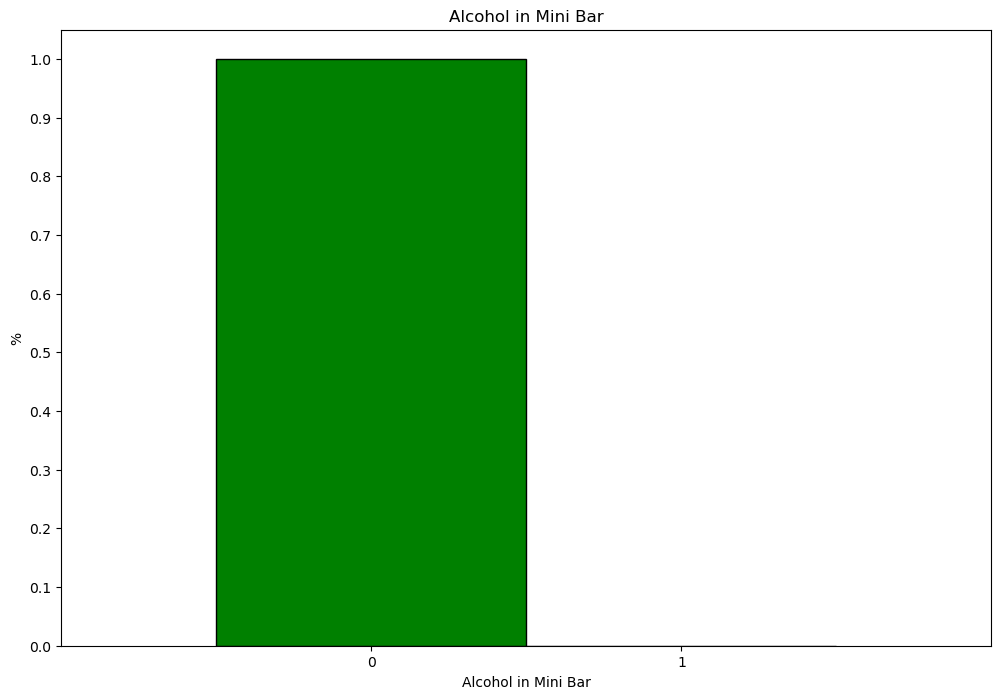

99.98% of customers do not request no alcohol in the mini bar.
0.02% of customers request no alcohol in the mini bar.


In [114]:
plt.figure(figsize=(12, 8))
plt.hist(customers['SRNoAlcoholInMiniBar'], bins=[-0.5, 0.5, 1.5], color='green', weights=[1 / len(customers['SRNoAlcoholInMiniBar'])] * len(customers['SRNoAlcoholInMiniBar']), edgecolor='black')
plt.title('Alcohol in Mini Bar')
plt.xlabel('Alcohol in Mini Bar')
plt.ylabel('%')
plt.xticks(range(2))
plt.yticks([i/10 for i in range(11)])
plt.xlim([-1, 2])
plt.show()

print(f'{(len(customers[customers["SRNoAlcoholInMiniBar"] == 0]) / len(customers) * 100):.2f}% of customers do not request no alcohol in the mini bar.')
print(f'{(len(customers[customers["SRNoAlcoholInMiniBar"] == 1]) / len(customers) * 100):.2f}% of customers request no alcohol in the mini bar.')

<a class="anchor" id="sub-section-1_5_3_7">

#### 1.5.3.7. SRQuietRoom
    
</a>

In [115]:
customers['SRQuietRoom'].value_counts()

SRQuietRoom
0    50357
1     5280
Name: count, dtype: int64

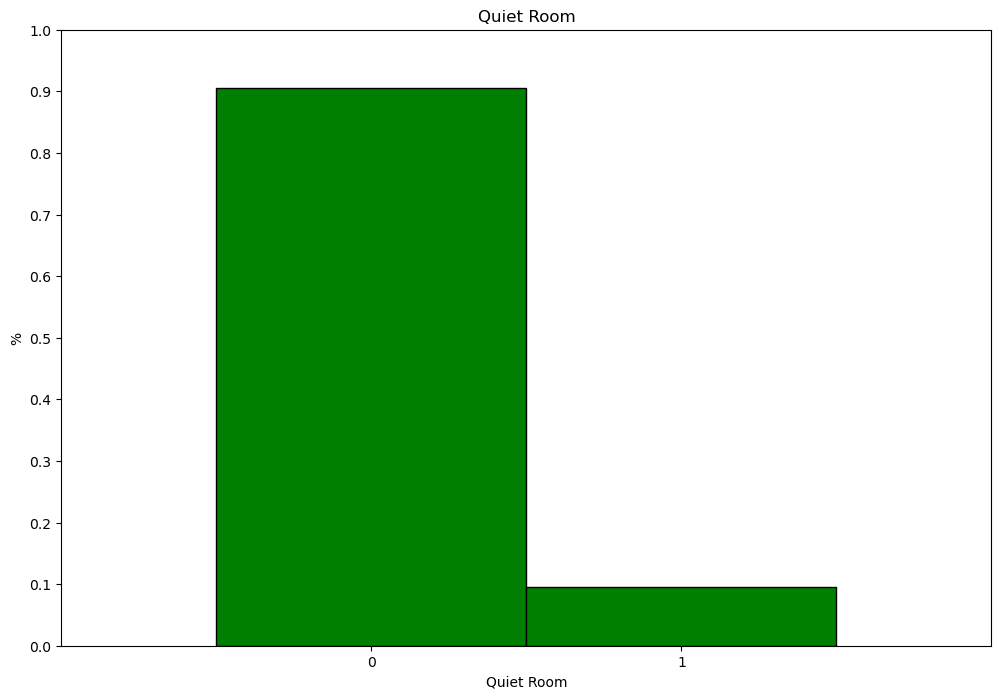

90.51% of customers do not request a quiet room.
9.49% of customers request a quiet room.


In [116]:
plt.figure(figsize=(12, 8))
plt.hist(customers['SRQuietRoom'], bins=[-0.5, 0.5, 1.5], color='green', weights=[1 / len(customers['SRQuietRoom'])] * len(customers['SRQuietRoom']), edgecolor='black')
plt.title('Quiet Room')
plt.xlabel('Quiet Room')
plt.ylabel('%')
plt.xticks(range(2))
plt.yticks([i/10 for i in range(11)])
plt.xlim([-1, 2])
plt.show()

print(f'{len(customers[customers["SRQuietRoom"] == 0]) / len(customers) * 100:.2f}% of customers do not request a quiet room.')
print(f'{len(customers[customers["SRQuietRoom"] == 1]) / len(customers) * 100:.2f}% of customers request a quiet room.')

<a class="anchor" id="chapter2"></a>

# 2. Data Preprocessing

</a>

<a class="anchor" id="sub-section-2_1"></a>

## 2.1. Feature Engineering

</a>

<a class="anchor" id="sub-section-2_1_1">

### 2.1.1. TotalSR
    
</a>

In [117]:
customers.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,SRFloor,SRBathroom,SRElevator
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,59,292.0,82.3,1,0,2,6,4,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,374.3,0,0,0
4,FRA,61.0,1385,93,240.0,60.0,0,0,1,10,5,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0,0,0,0
6,JPN,55.0,1385,58,230.0,24.0,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,254.0,0,0,0
8,FRA,33.0,1385,38,535.0,94.0,0,0,1,10,5,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,629.0,0,0,0
10,IRL,26.0,1385,96,174.0,69.0,0,0,1,6,3,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,243.0,0,0,0


In [118]:
# List of columns to exclude (created in the EDA)
exclude_columns = ['SRFloor', 'SRBathroom', 'SRElevator']

# Filter columns that start with 'SR' and are not in the exclude list
sr_columns_to_sum = [col for col in customers.columns if col.startswith('SR') and col not in exclude_columns]

# Create the TotalSR column by summing the filtered SR columns
customers['TotalSR'] = customers[sr_columns_to_sum].sum(axis=1)

customers['TotalSR'].value_counts()

TotalSR
1    27389
0    21871
2     5805
3      535
4       37
Name: count, dtype: int64

In [119]:
customers['TotalSR'].describe()

count    55637.000000
mean         0.732462
std          0.685798
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: TotalSR, dtype: float64

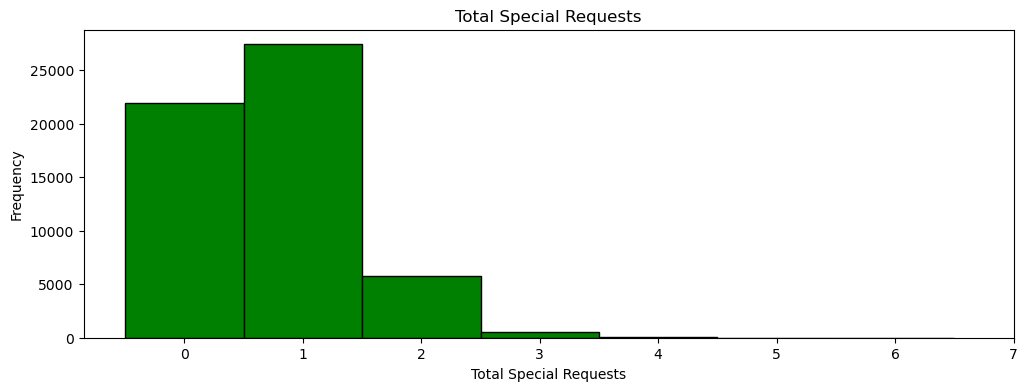

In [120]:
# Visualize TotalSR
plt.figure(figsize=(12, 4))
plt.hist(customers['TotalSR'], bins=np.arange(-0.5, 7.5, 1), color='green', edgecolor='black')
plt.title('Total Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Frequency')
plt.xticks(range(8))
plt.show()

<a class="anchor" id="sub-section-2_1_2">

### 2.1.2. Cancelation Rate
    
</a>

In [121]:
# Get variables starting with Booking
booking_columns = [col for col in customers.columns if col.startswith('Booking')]
booking_columns

['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']

In [122]:
# Create a new column called cancelation rate which is the ratio of bookings canceled to total bookings
customers['CancelationRate'] = customers['BookingsCanceled'] / (customers['BookingsCanceled'] + customers['BookingsCheckedIn'] + customers['BookingsNoShowed'])

In [123]:
customers['CancelationRate'].describe()

count    55637.000000
mean         0.000157
std          0.007800
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.500000
Name: CancelationRate, dtype: float64

In [124]:
customers['BookingsCanceled'].value_counts()

BookingsCanceled
0     55607
1        24
3         4
15        1
2         1
Name: count, dtype: int64

<a class="anchor" id="sub-section-2_1_3">

### 2.1.3. Revenue per Night
    
</a>

In [125]:
# Create revenue per night
customers['RevenuePerNight'] = (customers['LodgingRevenue'] + customers['OtherRevenue']) / customers['RoomNights']

In [126]:
customers['RevenuePerNight'].describe()

count    55637.000000
mean       162.703488
std        100.400555
min          0.666667
25%        109.373333
50%        137.850000
75%        178.325000
max       2068.500000
Name: RevenuePerNight, dtype: float64

<a class="anchor" id="sub-section-2_1_4">

### 2.1.4. Location
    
</a>

Create a variable to group different nationalities, keeping the most common nationalities. This piece of code was writting with the help of ChatGPT.

In [127]:
excluded_countries = {'FRA', 'DEU', 'PRT', 'GBR', 'ESP'}

def get_continent(alpha3_code):
    try:
        if alpha3_code in excluded_countries:
            return alpha3_code
        country = pc.country_alpha3_to_country_alpha2(alpha3_code)
        continent_code = pc.country_alpha2_to_continent_code(country)
        if continent_code == 'EU':
            return 'Europe'
        return 'RestOfTheWorld'
    except KeyError:
        return 'RestOfTheWorld'

customers['Location'] = customers['Nationality'].apply(lambda x: get_continent(x))

customers['Location'].value_counts()

Location
Europe            15279
FRA                9442
RestOfTheWorld     9261
DEU                7903
GBR                6309
PRT                4415
ESP                3028
Name: count, dtype: int64

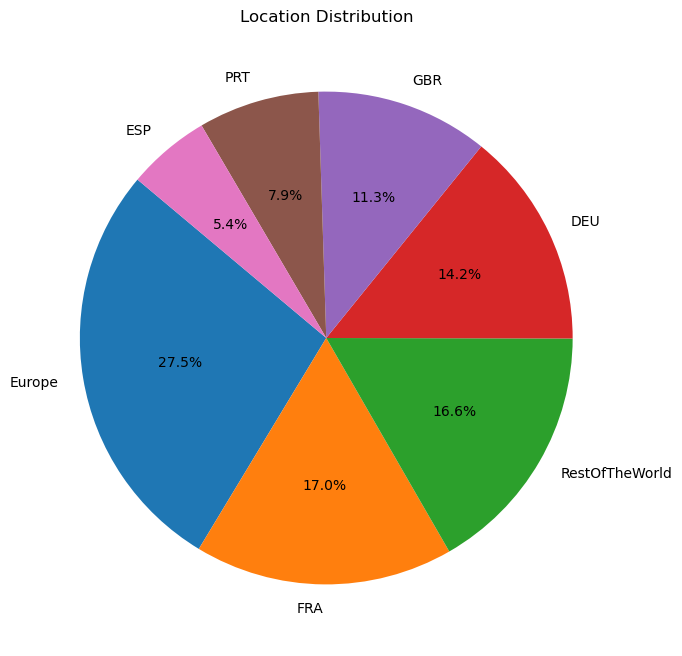

In [128]:
# Check distribution of Location with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(customers['Location'].value_counts(), labels=customers['Location'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Location Distribution')
plt.show()

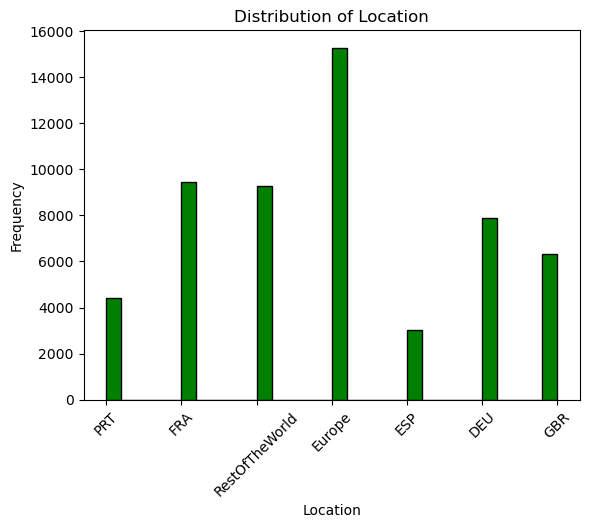

In [129]:
# Histogram of Location
plt.hist(customers['Location'], bins=30, color = 'green', edgecolor='black')
plt.title('Distribution of Location')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

<a class="anchor" id="sub-section-2_1_5">

### 2.1.5. Occupancy Rate
    
</a>

In [130]:
# Create a new collumn called Occupancy Rate = PersonsNights/RoomNights
customers['OccupancyRate'] = customers['PersonsNights'] / customers['RoomNights']

In [131]:
customers['OccupancyRate'].describe()

count    55637.000000
mean         2.206943
std          0.492799
min          1.058824
25%          2.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: OccupancyRate, dtype: float64

<a class="anchor" id="sub-section-2_1_6">

### 2.1.6. Length of Stay Per Booking (AvgStayLength)
    
</a>

We dropped rows where AvgStayLength was below 1, because it's not possible to have less rooms per night than bookings checkedIn. We also dropped rows where AvgStayLength was above 30, as it was an outlier.

In [132]:
customers['AvgStayLength'] = customers['RoomNights'] / customers['BookingsCheckedIn']

In [133]:
customers['AvgStayLength'].describe()

count    55637.000000
mean         3.251762
std          1.678685
min          0.500000
25%          2.000000
50%          3.000000
75%          4.000000
max         34.000000
Name: AvgStayLength, dtype: float64

In [134]:
# Check customers where avg stay length is bellow 1
customers[customers['AvgStayLength'] < 1]

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,SRFloor,SRBathroom,SRElevator,TotalSR,CancelationRate,RevenuePerNight,Location,OccupancyRate,AvgStayLength
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1367,BRA,44.0,1340,10,594.0,366.50,0,0,2,4,1,Direct,0,0,0,0,0,0,0,1,0,0,0,0,0,960.50,0,0,0,1,0.000000,960.5000,RestOfTheWorld,4.00,0.500000
48703,PRT,47.0,582,7,2687.0,3050.85,1,0,22,33,20,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,5737.85,0,0,0,0,0.043478,286.8925,PRT,1.65,0.909091


In [135]:
# Drop rows where AvgStayLength is below 1
customers = customers[customers['AvgStayLength'] >= 1]

In [136]:
customers['AvgStayLength'].describe()

count    55635.000000
mean         3.251854
std          1.678645
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         34.000000
Name: AvgStayLength, dtype: float64

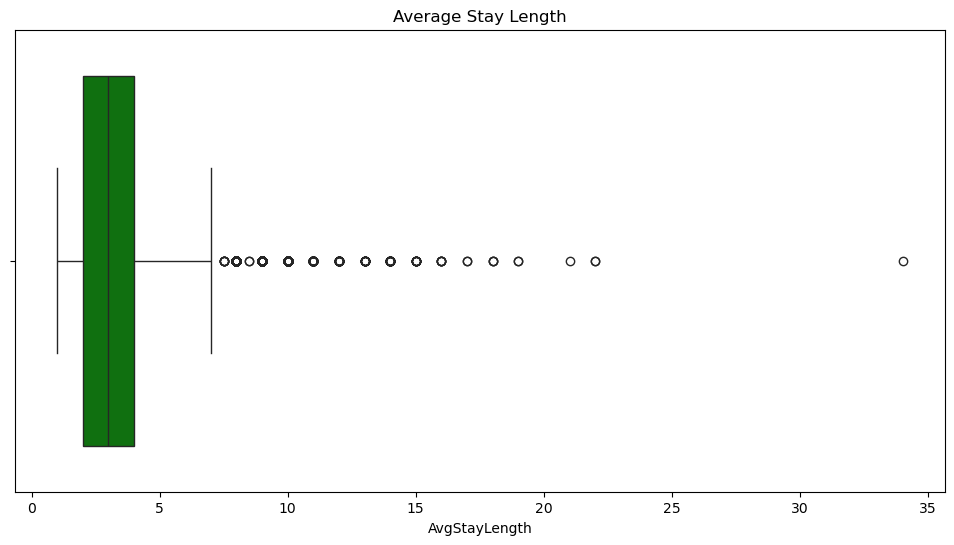

In [137]:
# Boxplot of AvgStayLength
plt.figure(figsize=(12, 6))
sns.boxplot(x=customers['AvgStayLength'], color='green')
plt.title('Average Stay Length')
plt.show()

In [138]:
# Drop rows that have AvgStayLength above 30
customers = customers[customers['AvgStayLength'] <= 30]

In [139]:
customers['AvgStayLength'].value_counts()

AvgStayLength
3.000000     15978
2.000000     11440
4.000000     11128
1.000000      7070
5.000000      4768
7.000000      2125
6.000000      1785
8.000000       366
1.500000       212
9.000000       183
2.500000       134
10.000000      129
11.000000       57
3.500000        53
12.000000       33
14.000000       30
13.000000       15
1.666667        13
4.500000        11
15.000000       10
1.333333        10
2.333333         7
7.500000         6
16.000000        5
1.250000         4
2.666667         4
1.200000         4
5.500000         3
6.500000         3
18.000000        3
22.000000        2
17.000000        2
1.375000         2
3.250000         2
1.750000         2
1.571429         2
19.000000        2
1.272727         2
8.500000         2
1.714286         1
2.600000         1
4.666667         1
3.800000         1
1.700000         1
2.750000         1
1.114286         1
2.153846         1
5.444444         1
2.800000         1
3.333333         1
2.625000         1
2.200000         

<a class="anchor" id="chapter3"></a>

# 3. Segmentation

</a>

Behaviour clustering:

- DaysSinceCreation (Customer loyalty loyal vs new customer) float64
- AverageLeadTime (Customer preparation high vs low) float64
- AvgStayLength (Long stays vs short stays) [ratio of RoomNights/BookingsCheckedIn]

Variables to consider for profilling:
- Location (where customers come from?)
- DistributionChannel (how bookings are made?)
- Age (young/old)
- TotalSR (Are customers very demanding or flexible?)
- TotalSpent (How much do customers spend?)

In [140]:
# Check colums in dataframe
customers.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'TotalRevenue', 'SRFloor',
       'SRBathroom', 'SRElevator', 'TotalSR', 'CancelationRate',
       'RevenuePerNight', 'Location', 'OccupancyRate', 'AvgStayLength'],
      dtype='object')

In [141]:
# Check each variable cardinality for categorical variables
customers.select_dtypes(include='object').nunique()

Nationality            170
DistributionChannel      4
Location                 7
dtype: int64

<a class="anchor" id="sub-section-3_1"></a>

## 3.1. Data Scaling

</a>

In [142]:
# Define clustering features
features = ['DaysSinceCreation', 'AverageLeadTime', 'PersonsNights', 'RoomNights', 'LodgingRevenue','OtherRevenue' , 'BookingsCheckedIn']
X = customers[features].copy()

In [143]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
DaysSinceCreation,55634.0,697.803340,375.804260,36.0,391.00,730.0,1021.0000,1385.00
AverageLeadTime,55634.0,97.311015,91.327053,0.0,26.00,71.0,146.0000,588.00
PersonsNights,55634.0,7.283316,4.266402,2.0,4.00,6.0,9.0000,99.00
RoomNights,55634.0,3.303178,1.784597,1.0,2.00,3.0,4.0000,88.00
LodgingRevenue,55634.0,420.492280,357.041913,0.0,216.75,330.9,503.3925,7083.88
OtherRevenue,55634.0,104.835111,123.433202,0.0,42.00,71.0,130.0000,3692.40
BookingsCheckedIn,55634.0,1.025973,0.436615,1.0,1.00,1.0,1.0000,76.00


In [144]:
# Apply MinMaxScaler (scales values between 0 and 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [145]:
X_scaled = pd.DataFrame(X_scaled, columns=features)

In [146]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
DaysSinceCreation,55634.0,0.490588,0.278580,0.0,0.263158,0.514455,0.730170,1.0
AverageLeadTime,55634.0,0.165495,0.155318,0.0,0.044218,0.120748,0.248299,1.0
PersonsNights,55634.0,0.054467,0.043984,0.0,0.020619,0.041237,0.072165,1.0
RoomNights,55634.0,0.026473,0.020513,0.0,0.011494,0.022989,0.034483,1.0
LodgingRevenue,55634.0,0.059359,0.050402,0.0,0.030598,0.046712,0.071062,1.0
OtherRevenue,55634.0,0.028392,0.033429,0.0,0.011375,0.019229,0.035207,1.0
BookingsCheckedIn,55634.0,0.000346,0.005822,0.0,0.000000,0.000000,0.000000,1.0


<a class="anchor" id="sub-section-3_2"></a>

## 3.2. Clustering

</a>

<a class="anchor" id="sub-section-3_2_1"></a>

### 3.2.1. KMeans

</a>

In [147]:
# Determine the optimal number of clusters using inertia with the Elbow Method
wcss = []  # Within-cluster sum of squares
silhouette_scores = []  # Silhouette scores for evaluation
K_range = range(2, 11)  # Checking K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Append WCSS value

    # Calculate silhouette score for each k
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

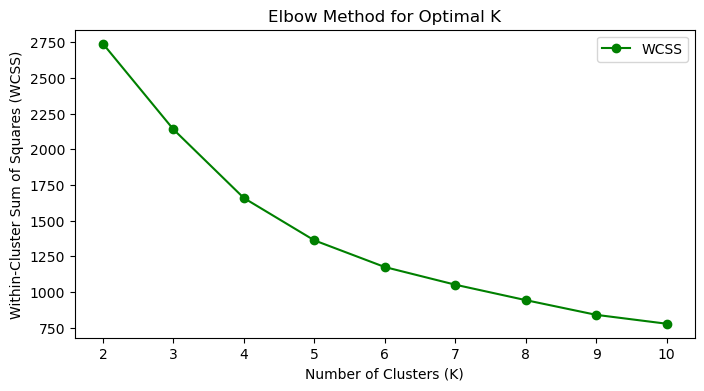

In [148]:
# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o', linestyle='-', label="WCSS", color='green')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

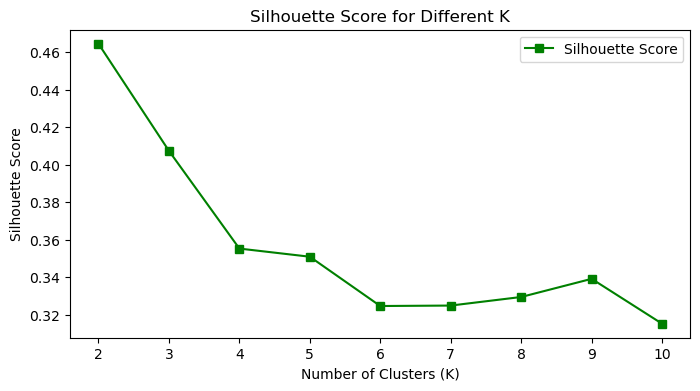

In [149]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-', color='green', label="Silhouette Score")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.legend()
plt.show()

We will go with K=4.

In [150]:
# Define the optimal number of clusters based on the elbow method and silhouette score
optimal_k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customers['Cluster'] = kmeans.fit_predict(X_scaled)

# Show some sample results
print(customers[['DaysSinceCreation', 'AverageLeadTime', 'TotalRevenue', 'PersonsNights', 'Cluster']].head())

    DaysSinceCreation  AverageLeadTime  TotalRevenue  PersonsNights  Cluster
ID                                                                          
1                 440               59         374.3              6        1
4                1385               93         300.0             10        0
6                1385               58         254.0              4        0
8                1385               38         629.0             10        0
10               1385               96         243.0              6        0


To evaluate the clustering solution, we will calculate R2 to see how much variance is explained my the clustering solution.

In [151]:
# Function to get the total of sum squares to calculate R2
# using R² to evaluate how well the clustering solution explains the variability in the data 
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [152]:
# Calculate the total sum of squares (SST) using get_ss() function that calculates the sum of sum squares for each variable
sst = get_ss(customers[features])  

# Get the sum of squares for each cluster label (SSW)
ssw_labels = customers[features + ["Cluster"]].groupby(by='Cluster').apply(get_ss)  

# Calculate the sum of squares between clusters (SSB)
ssb = sst - np.sum(ssw_labels) 

# Calculate the R2 value
r2 = ssb / sst
print(f'{round((r2*100), 2)}% of the variance in the data is explained by the clusters.')

43.89% of the variance in the data is explained by the clusters.


/var/folders/_p/41c5vhm5085_zhqsl8brxs8c0000gn/T/ipykernel_75694/446885467.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = customers[features + ["Cluster"]].groupby(by='Cluster').apply(get_ss)


<a class="anchor" id="sub-section-3_2_2"></a>

### 3.2.2. DBSCAN

</a>

When choosing the number of neighbors and the number of samples, we decided to use 50 because the original dataset has around 25 features, and we multiplied it by 2.

There is no specific reason for choosing this number; we found this suggestion in a data science forum, where it was recommended as a starting point. However, most combinations we tested performed worse compared to the KMeans method.

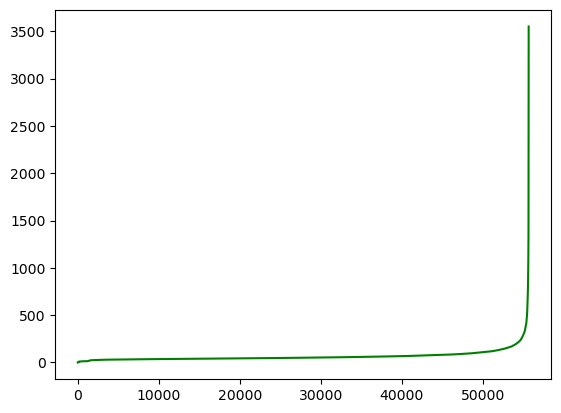

In [153]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=50) # the original dataset has around 50 features * 2
neigh.fit(X)
distances, _ = neigh.kneighbors(X)
distances = np.sort(distances[:, -1])
plt.plot(distances, color='green')
plt.show()

In [154]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=300 , min_samples=50)
dbscan_labels = dbscan.fit_predict(X)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


In [155]:
# Concatenating the labels to df
df_concat = pd.concat([X, pd.Series(dbscan_labels, index=X.index, name="dbscan_labels")], axis=1)
df_concat.head()

,DaysSinceCreation,AverageLeadTime,PersonsNights,RoomNights,LodgingRevenue,OtherRevenue,BookingsCheckedIn,dbscan_labels
ID,,,,,,,,
1,440,59,6,4,292.0,82.3,2,0
4,1385,93,10,5,240.0,60.0,1,0
6,1385,58,4,2,230.0,24.0,1,0
8,1385,38,10,5,535.0,94.0,1,0
10,1385,96,6,3,174.0,69.0,1,0


In [156]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1].head()

,DaysSinceCreation,AverageLeadTime,PersonsNights,RoomNights,LodgingRevenue,OtherRevenue,BookingsCheckedIn,dbscan_labels
ID,,,,,,,,
77,1384,70,8,4,875.16,1189.20,1,-1
78,1384,70,8,4,875.16,1201.70,1,-1
601,1365,9,25,18,1753.00,3692.40,15,-1
1218,1344,57,8,4,612.00,1189.50,1,-1
2413,1320,4,33,21,1593.00,744.42,5,-1


In [157]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(X)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R2 of %0.4f" % r2)

Cluster solution with R2 of 0.1418


/var/folders/_p/41c5vhm5085_zhqsl8brxs8c0000gn/T/ipykernel_75694/502760628.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


We got an small number of clusters and a low R2 score so we will discard this approach.

<a class="anchor" id="sub-section-3_2_3"></a>

### 3.2.2. Meanshift

</a>

In [158]:
bandwidth = estimate_bandwidth(X_scaled, quantile=0.45, random_state=1, n_jobs=-1)
bandwidth

0.36451540671031685

In [159]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(X_scaled)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 6


In [160]:
# Concatenating the labels to df
df_concat = pd.concat([X, pd.Series(ms_labels, index=X_scaled.index, name="ms_labels")], axis=1)
df_concat.sample(15)

,DaysSinceCreation,AverageLeadTime,PersonsNights,RoomNights,LodgingRevenue,OtherRevenue,BookingsCheckedIn,ms_labels
63355,463.0,30.0,2.0,1.0,299.00,14.00,1.0,NaN
83603,290.0,91.0,2.0,1.0,143.00,2.00,1.0,NaN
44491,627.0,51.0,8.0,4.0,813.20,22.00,1.0,0.0
9234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
88915,227.0,53.0,8.0,4.0,216.44,36.20,1.0,NaN
104089,97.0,192.0,10.0,5.0,476.35,81.50,1.0,NaN
43552,643.0,191.0,10.0,5.0,314.00,70.00,1.0,0.0
106661,76.0,155.0,15.0,5.0,823.50,154.35,1.0,NaN
46222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
64150,457.0,2.0,15.0,3.0,1022.00,177.50,1.0,NaN


In [161]:
df_concat.ms_labels.value_counts()

ms_labels
0.0    55613
3.0       10
5.0        5
4.0        3
1.0        2
2.0        1
Name: count, dtype: int64

In [162]:
# Computing the R2 of the cluster solution
sst = get_ss(X)  # get total sum of squares
ssw_labels = df_concat.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.6054


/var/folders/_p/41c5vhm5085_zhqsl8brxs8c0000gn/T/ipykernel_75694/3118775263.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels


We will not use this algorithm because it basically puts the entire dataset in 1 cluster making it harder to make possible client engagement solutions.

<a class="anchor" id="sub-section-3_3"></a>

## 3.3. Analysis & Profilling

</a>

From the three different algorithms tested for clustering, KMeans provided the best R2 result as well as a good number of clusters, thus confirming our choice to use this algorithm. <br>

Variables to consider for profilling:
- Location (where customers come from?)
- DistributionChannel (how bookings are made?)
- Age (young/old)
- TotalSR (Are customers very demanding or flexible?)
- TotalSpent (How much do customers spend?)

In [163]:
X.columns

Index(['DaysSinceCreation', 'AverageLeadTime', 'PersonsNights', 'RoomNights',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCheckedIn'],
      dtype='object')

In [164]:
# Define clustering features
features = ['DaysSinceCreation', 'AverageLeadTime', 'PersonsNights', 'RoomNights', 'LodgingRevenue','OtherRevenue' , 'BookingsCheckedIn']
X = customers[features].copy()

In [165]:
customers['Cluster'].value_counts()

Cluster
1    18593
0    15848
2    15002
3     6191
Name: count, dtype: int64

In [166]:
# Get the average for each variable for each cluster
cluster_summary = customers.groupby('Cluster').agg({'DaysSinceCreation': 'mean',
                                                    'AverageLeadTime': 'mean',
                                                    'AvgStayLength': 'mean',
                                                    'TotalRevenue': 'mean',
                                                    'Age': 'mean',
                                                    'TotalSR': 'mean',
                                                    }).reset_index()

In [167]:
cluster_summary

,Cluster,DaysSinceCreation,AverageLeadTime,AvgStayLength,TotalRevenue,Age,TotalSR
0,0,1140.820419,61.219586,3.197702,453.210553,48.175416,0.683115
1,1,262.711343,102.099769,3.378399,593.137286,47.743129,0.770989
2,2,707.840021,60.826556,3.123494,530.212678,47.704839,0.729036
3,3,846.109029,263.726700,3.316508,494.448566,55.740268,0.751575


In [168]:
# Check min,max and mean values for each cluster
customers.groupby('Cluster').agg({'DaysSinceCreation': ['min', 'max', 'mean'],
                                  'AverageLeadTime': ['min', 'max', 'mean'],
                                  'AvgStayLength': ['min', 'max', 'mean'],
                                  'TotalRevenue': ['min', 'max', 'mean'],
                                  'Age': ['min', 'max', 'mean'],
                                  })

DaysSinceCreation                    AverageLeadTime                   \
                      min   max         mean             min  max        mean   
Cluster                                                                         
0                     924  1385  1140.820419               0  230   61.219586   
1                      36   537   262.711343               0  380  102.099769   
2                     444   928   707.840021               0  189   60.826556   
3                     328  1237   846.109029             145  588  263.726700   

        AvgStayLength                 TotalRevenue                        Age  \
                  min   max      mean          min      max        mean   min   
Cluster                                                                         
0                 1.0  22.0  3.197702          2.0  5548.30  453.210553  18.0   
1                 1.0  21.0  3.378399          4.0  8607.00  593.137286  18.0   
2                 1.0  15.0  3.123494          3.0  7973.38  530.212678  18.0   
3                 1.0  16.0  3.316508          7.0  5176.80  494.448566  18.0   

                          
          max       mean  
Cluster                   
0        89.0  48.175416  
1        90.0  47.743129  
2        89.0  47.704839  
3        89.0  55.740268

In [169]:
# Get the Location mode for each cluster
location_mode = customers.groupby('Cluster')['Location'].agg(pd.Series.mode).reset_index()
location_mode

,Cluster,Location
0,0,Europe
1,1,Europe
2,2,Europe
3,3,DEU


In [170]:
# get the location value counts for each cluster
location_counts = customers.groupby('Cluster')['Location'].value_counts().unstack().reset_index()
location_counts

Location,Cluster,DEU,ESP,Europe,FRA,GBR,PRT,RestOfTheWorld
0,0,1594,1187,4208,3394,1477,1832,2156
1,1,2813,779,5225,2787,2136,1138,3715
2,2,1691,897,4362,2533,1662,1154,2703
3,3,1805,165,1484,728,1034,289,686


In [171]:
# get the DistributionChanel mode for each cluster
distribution_mode = customers.groupby('Cluster')['DistributionChannel'].agg(pd.Series.mode).reset_index()
distribution_mode

,Cluster,DistributionChannel
0,0,Travel Agent/Operator
1,1,Travel Agent/Operator
2,2,Travel Agent/Operator
3,3,Travel Agent/Operator


In [172]:
# get the DistributionChanel value counts for each cluster
distribution_counts = customers.groupby('Cluster')['DistributionChannel'].value_counts().unstack().reset_index()
distribution_counts

DistributionChannel,Cluster,Corporate,Direct,GDS Systems,Travel Agent/Operator
0,0,219.0,1721.0,6.0,13902.0
1,1,84.0,3004.0,26.0,15479.0
2,2,179.0,2172.0,14.0,12637.0
3,3,21.0,415.0,NaN,5755.0


### 3.3.1 Profilling

	Cluster 0: Established, Budget-Conscious Customers

- Days Since Creation: 1140 days (Longest customer history)
- Average Lead Time: 61 days (Moderate planning time before booking)
- Average Stay Length: 3.2 days (Short stays)
- Total Revenue: €453 (Lowest revenue contribution)
- Age: 48.2 years (Older customer base)
- Total Special Requests (SR): 0.68 (Few requests)

Profile:
These are long-time customers who book their stays moderately in advance and stay for a short period. Their revenue contribution is the lowest, possibly indicating budget-conscious behavior. They make relatively few special requests, suggesting they have simple lodging preferences.

    Cluster 1: High-Spending, Advanced Planners
- Days Since Creation: 262 days (Newest customers)
- Average Lead Time: 102 days (Longest planning period)
- Average Stay Length: 3.4 days
- Total Revenue: €593 (Highest revenue contribution)
- Age: 47.7 years
- Total Special Requests (SR): 0.77 (Moderate requests)

Profile:
These are relatively new customers who plan well in advance and have the highest revenue contribution. They likely book premium packages or make additional purchases at the hotel. They also make more special requests than other segments, possibly indicating a preference for tailored experiences.

    Cluster 2: Standard, Consistent Customers
- Days Since Creation: 708 days
- Average Lead Time: 60.8 days
- Average Stay Length: 3.1 days
- Total Revenue: €530
- Age: 47.7 years
- Total Special Requests (SR): 0.73

Profile:
This cluster represents regular, mid-tier customers. Their booking behavior is predictable with moderate lead time and a relatively stable revenue contribution. They are slightly older and make a fair number of special requests, suggesting a balance between standard and customized experiences.

    Cluster 3: Older, High-Commitment Customers
- Days Since Creation: 846 days
- Average Lead Time: 263 days (Extreme advance planning)
- Average Stay Length: 3.3 days
- Total Revenue: €494
- Age: 55.7 years (Oldest customer group)
- Total Special Requests (SR): 0.75

Profile:
This cluster consists of older, highly organized customers who book significantly in advance. Their revenue is moderate, but they might be loyal, repeat guests. They also have slightly more special requests than other groups, possibly indicating a demand for comfort and specific preferences.

### 3.3.2 Business implications

The segmentation of hotel customers reveals distinct behavioral patterns that can inform targeted marketing and operational strategies.

Cluster 0, composed of `long-time but budget-conscious customers`, tends to book their stays moderately in advance and contribute the least revenue. To retain their loyalty, the hotel can **offer targeted promotions, personalized discounts, and upselling opportunities for additional services like dining or spa packages**. Maintaining competitive pricing and emphasizing customer loyalty programs could encourage repeat bookings and increased spending.

In contrast, Cluster 1 consists of `high-spending customers who plan their stays well in advance`. Their significant revenue contribution suggests they are willing to invest in premium experiences. To maximize engagement, the hotel should **offer exclusive packages, premium room upgrades, and personalized recommendations based on past preferences**. Since these customers book early, targeted email marketing campaigns with tailored offers could further solidify their commitment and encourage direct bookings.

Cluster 2 represents standard, consistent `customers with predictable booking behavior and moderate revenue contribution`. Since they fall between budget-conscious and premium segments, the hotel should **focus on maintaining steady engagement through occasional incentives and personalized discounts**. Offering special deals on extended stays or curated experiences aligned with their average stay length could enhance customer satisfaction and encourage repeat visits.

Lastly, Cluster 3 is characterized by `older customers who book significantly in advance and demonstrate a strong commitment to the hotel`. Their preferences likely lean toward comfort and reliability, making them ideal candidates for **tailored services such as senior discounts, long-term stay offers, and personalized customer service experiences**. Ensuring a high-touch approach, where their preferences are noted and catered to, can strengthen their loyalty and increase the likelihood of future bookings.

By leveraging these insights, the hotel can optimize pricing strategies, enhance customer experiences, and implement targeted marketing initiatives that align with the distinct behaviors and preferences of each customer segment.